# import

In [1]:
import sys

package_root = r"F:\onedrive\vs experiment\pyqcat-visage"
sys.path.insert(0, package_root)
package_root = r"F:\onedrive\vs experiment\transmon-qubit"
sys.path.insert(1, package_root)
sys.executable
%load_ext autoreload
%autoreload 2

In [8]:
from pathlib import Path
import json
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import glob
from datetime import datetime
from copy import deepcopy
from typing import Union, List
from scipy.optimize import fsolve, leastsq, curve_fit, least_squares, minimize

from pyQCat.analysis.fit.fit_models import *
from pyQCat.analysis.algorithms import guess
from pyQCat.tools import qarange
from functions.fit_tools import fit_cos
from functions.formulas import cosine
from functions.plot_tools import PlotTool
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
ploter = PlotTool(figsize=(8, 5), cmap='jet', flag_save=True)

# %matplotlib notebook
%matplotlib inline

# 耦合系数提取

$c_{11,17}$  AC谱

In [4]:
data1 = np.loadtxt(r'F:\onedrive\vs experiment\coupler exp\实验数据\ac谱 c11-17\下\CouplerACSpectrum.dat')
z_list1 = data1[:-28, 0] - (0.1018 + 0.0218)
f_list1 = data1[:-28, 1]
data2 = np.loadtxt(r'F:\onedrive\vs experiment\coupler exp\实验数据\ac谱 c11-17\上\CouplerACSpectrum.dat')
z_list2 = data2[:, 0] - 0.12
f_list2 = data2[:, 1] + 32 - 42
z_list = np.hstack((z_list1[:69], z_list2[20 : -4]))
f_list = np.hstack((f_list1[:69], f_list2[20 : -4]))
z_list = np.hstack((z_list, np.array([-0.23265, -0.25412])))
f_list = np.hstack((f_list, np.array([4515.534, 4416])))

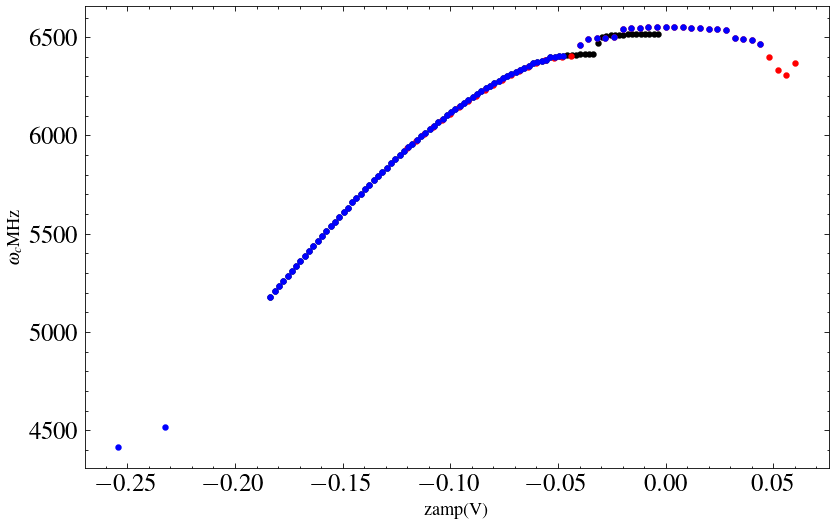

In [5]:
fig, ax = plt.subplots()
ax.scatter(z_list1, f_list1, label='raw data', s=8)
ax.scatter(z_list2, f_list2, label='raw data', s=8)
ax.scatter(z_list, f_list, label='raw data', s=8)
ax.set_xlabel(r'zamp(V)')
ax.set_ylabel(r'$\omega_c\text{MHz}$')
plt.show()

In [6]:
p0 = [
    np.max(f_list), 200,
    1.78, 0.0, 0.5
]
param_bounds = [(4300, 7000), (-100000000, 100000000), (1.75, 1.83), (-0.01, 0.01), (0, 1)]
upper = [bound[1] for bound in param_bounds]
lower = [bound[0] for bound in param_bounds]
popt_wc_11_17, _ = scipy.optimize.curve_fit(amp2freq_formula,
                                   z_list,
                                   f_list,
                                   p0=p0,
                                   bounds=(lower, upper),
                                   maxfev=100000,
                                   ftol=1.49012e-8,
                                   xtol=1.49012e-8)

In [12]:
popt_wc_11_17
popt_wq1 = np.array([4713.86040185, -342.70750212, 1.87218693, 0.0718007, -0.76150655])
popt_wq2 = np.array([4390.282741, 115.897848, 1.795726, -0.051569, -0.805077])

\begin{align}
&\phi=\pi\ast M\ast(A - A_{off})\\
&f_q=(f_{q,max}+\Delta)\times\sqrt{\sqrt{1 + d^2 (\tan\phi)^2}\times\left|\cos\phi\right|}-\Delta
\end{align}

In [14]:
amp2freq_formula(-0.213748, *popt_wc_11_17)

4778.618938376963

\begin{align}
&\alpha=\frac{f_q+\Delta}{\Delta+f_{q,max}}\\
&\beta=\frac{{\alpha}^4-d^2}{1-d^2}\\
&A=\left|\frac{\arccos\beta}{M\cdot\pi}\right|+A_{off}
\end{align}

In [15]:
freq2amp_formula(5500, *popt_wc_11_17)

0.16790974354385582

$C_{17,18}$ AC谱

In [16]:
data1 = np.loadtxt(r'F:\onedrive\vs experiment\coupler exp\实验数据\ac谱 c17-18\下\CouplerACSpectrum.dat')
z_list1 = data1[:-28, 0] - (0.1018 + 0.0218)
f_list1 = data1[:-28, 1]
data2 = np.loadtxt(r'F:\onedrive\vs experiment\coupler exp\实验数据\ac谱 c17-18\上\CouplerACSpectrum.dat')
z_list2 = data2[:, 0] - 0.12
f_list2 = data2[:, 1] + 32 - 42
z_list = np.hstack((z_list1[:69], z_list2[20 : -4]))
f_list = np.hstack((f_list1[:69], f_list2[20 : -4]))
z_list = np.hstack((z_list, np.array([-0.23265, -0.25412])))
f_list = np.hstack((f_list, np.array([4515.534, 4416])))

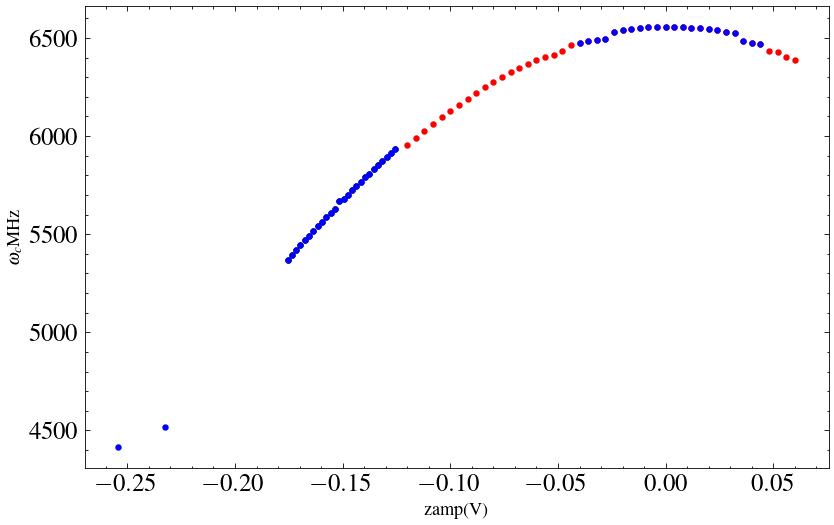

In [17]:
fig, ax = plt.subplots()
ax.scatter(z_list1, f_list1, label='raw data', s=8)
ax.scatter(z_list2, f_list2, label='raw data', s=8)
ax.scatter(z_list, f_list, label='raw data', s=8)
ax.set_xlabel(r'zamp(V)')
ax.set_ylabel(r'$\omega_c\text{MHz}$')
plt.show()

In [18]:
p0 = [
    np.max(f_list), 200,
    1.78, 0.0, 0.5
]
param_bounds = [(4300, 7000), (-100000000, 100000000), (1.75, 1.83), (-0.01, 0.01), (0, 1)]
upper = [bound[1] for bound in param_bounds]
lower = [bound[0] for bound in param_bounds]
popt_wc_17_18, _ = scipy.optimize.curve_fit(amp2freq_formula,
                                   z_list,
                                   f_list,
                                   p0=p0,
                                   bounds=(lower, upper),
                                   maxfev=100000,
                                   ftol=1.49012e-8,
                                   xtol=1.49012e-8)

In [19]:
popt_wc_17_18

array([ 6.55053823e+03, -1.51294383e+03,  1.83000000e+00,  2.43664557e-03,
        3.09223652e-01])

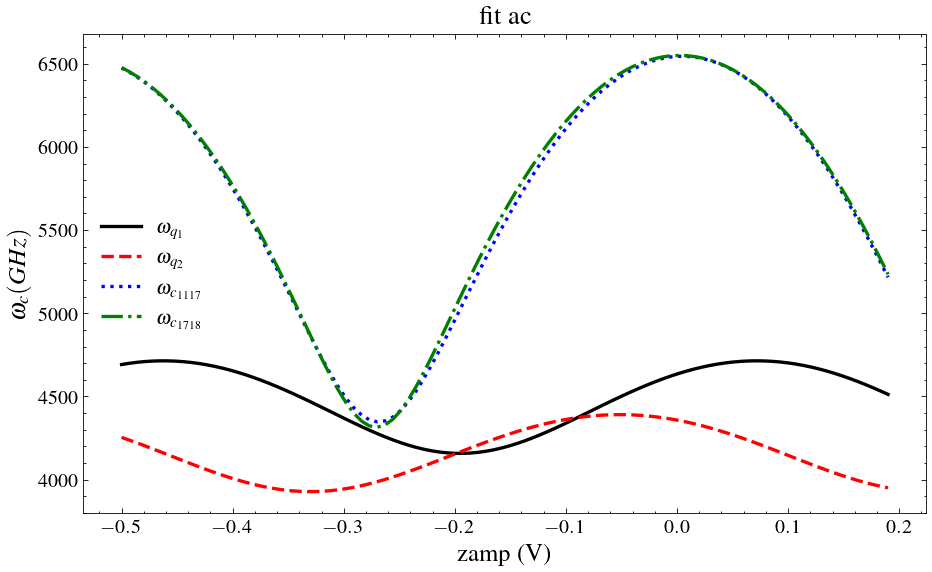

In [20]:
fig, ax = plt.subplots()
# ax.scatter(z_list, f_list, label='raw data', s=10, c='r')
ax.plot(np.linspace(-0.5, 0.19, 100), amp2freq_formula(np.linspace(-0.5, 0.19, 100), *popt_wq1), label=r'$\omega_{q_1}$', linewidth=2)
ax.plot(np.linspace(-0.5, 0.19, 100), amp2freq_formula(np.linspace(-0.5, 0.19, 100), *popt_wq2), label=r'$\omega_{q_2}$', linewidth=2)
ax.plot(np.linspace(-0.5, 0.19, 100), amp2freq_formula(np.linspace(-0.5, 0.19, 100), *popt_wc_11_17), label=r'$\omega_{c_{11 17}}$', linewidth=2)
ax.plot(np.linspace(-0.5, 0.19, 100), amp2freq_formula(np.linspace(-0.5, 0.19, 100), *popt_wc_17_18), label=r'$\omega_{c_{17 18}}$', linewidth=2)

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}

ax.set_xlabel(r'zamp (V)', fontdict=font)
ax.set_ylabel(r'$\omega_{c} (GHz)$', fontdict=font)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend()
ax.set_title('fit ac')
# ax.set_title(
    # f'fq_max = {popt_wq2[0]} detune = {popt_wq2[1]} M = {popt_wq2[2]} \n offset = {popt_wq2[3]} d = {popt_wq2[4]}',
    # fontdict=font)
plt.tight_layout()
# plt.savefig(r'F:\wangpeng\data\观察比特20240110\实验数据\ac谱 c11-17\AC谱_c11-17.png')

## QC耦合

In [16]:
def fit_swap(x, y, popt0=None, spec_paras=None, fit_type='2order'):
    if fit_type == '2order':
        # 如果没有给能谱参数，则使用二次函数关系近似
#         func = lambda x, g, coe, offset: np.sqrt(4 * g ** 2 + (coe * x + offset) ** 2)
        func = lambda x, g, a, b, c: np.sqrt(4 * g ** 2 + (a * x ** 2 + b * x + c) ** 2)
        if popt0 is None:
            g0 = np.min(y) / 2
            a0 = -80
            b0 = -40
            c0 = -2
            popt0 = [g0, a0, b0, c0]
        def error(paras, *args):
            g, a, b, c = paras
            x, y = args
            return func(x, g, a, b, c) - y
        num = 0; rmse = np.inf;
        while (rmse > 1e-9) and (num < 10000):
            popt, *_ = leastsq(error, x0=popt0, args=(x, y))
            popt0 = popt
            num += 1
            rmse = np.sum(error(popt, *(x, y))**2) / len(x) 
        print('iter:',num)
        
        print('rmse:',np.sum(error(popt, *(x, y))**2) / len(x))
        print('popt:',popt)
        
        g, a, b, c = popt
        xmin = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
        if not min(x) < xmin < max(x):
            xmin = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
        print(popt)
        gmin = abs(g)
        return xmin, gmin, popt, lambda x: func(x, *popt)
    elif fit_type == '1order':
        func = lambda x, g, a, b: np.sqrt(4 * g ** 2 + a ** 2 * (x - b) ** 2)
        if popt0 is None:
            g0 = np.min(y) / 2
            a0 = 1
            b0 = np.mean(x)
            popt0 = [g0, a0, b0]
        
        def error(paras,*args):
            g, a, b = paras
            x, y = args
            return func(x, g, a, b) - y
        num = 0; rmse = np.inf;
        while (rmse > 1e-4) and (num < 2000):
            popt, *_ = leastsq(error, x0=popt0, args=(x,y))
            popt0 = popt
            num += 1
            rmse = np.sum(error(popt, *(x, y)) ** 2) / len(x) 
        print('iter:', num)
        
        print('rmse:', np.sum(error(popt, *(x, y)) ** 2) / len(x))
        print('popt:', popt)
        
        g, a, b = popt
        xmin = b
        gmin = abs(g)
        return xmin, gmin, popt, lambda x: func(x, *popt)
    elif fit_type == 'spectrum':
        # 如果给了能谱参数，则使用公式np.sqrt(4*g**2+(w2-w1)**2) 
        def func(x, g, w1):
            w2 = _qubit_spectrum(x, *spec_paras)
            return np.sqrt(4 * g ** 2 + (w2 - w1) ** 2)
        popt, _ = curve_fit(func, x, y, p0=[10, 4e3])
        g, w1 = popt
        xmin = w1
        gmin = abs(g)
        return xmin, gmin, popt, lambda x: func(x, *popt)
    else:
        raise Exception("fit_type must be '1order','2order' or 'spectrum'")

提取$q_{17},c_{17,18}$的耦合

In [17]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qhqc 1718'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [18]:
idx_min = zamp_list_all.index(-0.26)
idx_max = zamp_list_all.index(-0.22)
zamp_list = zamp_list_all[idx_min : idx_max + 1]
P_arr = P_arr_all[idx_min : idx_max+  1]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

Optimal parameters not found: The maximum number of function evaluations is exceeded.


In [19]:
xmin, gmin, _, fun_swap = fit_swap(np.array(zamp_list), osc_freq_list, fit_type='2order')

iter: 10000
rmse: 1.0913796080077177e-06
popt: [  0.11867906 102.35724139  56.60655861   7.67260083]
[  0.11867906 102.35724139  56.60655861   7.67260083]


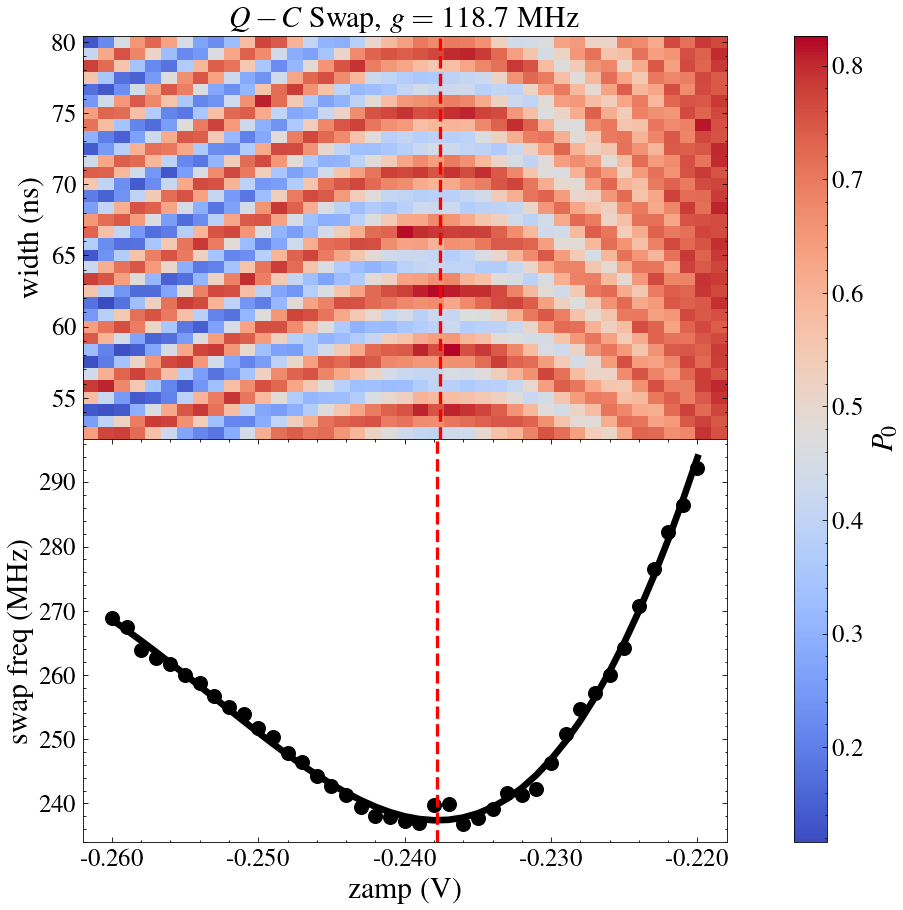

In [20]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-C$ Swap, $g={round(gmin * 1000, 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000)
ax1.plot(zamp_list, fun_swap(np.array(zamp_list)) * 1000)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

for ax in [ax0, ax1, cax]:
    ax.axvline(xmin, color='red', linestyle='--', linewidth=2)

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [21]:
g = gmin * 1000
wq = 4577.323
alphaq = -235.8
alphac = -120
amp = -0.20318
wc1 = amp2freq_formula(amp, *popt_wc_17_18)
print(wc1)
amp = freq2amp_formula(wq, *popt_wc_17_18)
wc2 = amp2freq_formula(amp, *popt_wc_17_18)
print(wc2)

rho_qc_17_17181 = g / np.sqrt((wq - alphaq) * (wc1 - alphac))
print(rho_qc_17_17181)
rho_qc_17_17182 = g / np.sqrt((wq - alphaq) * (wc2 - alphac))
print(rho_qc_17_17182)

4984.403040703344
4577.323
0.023943527768632754
0.02495947267139541


提取$q_{18},c_{17,18}$的耦合

In [22]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qlqc 1718'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [23]:
idx_min = zamp_list_all.index(-0.27)
idx_max = zamp_list_all.index(-0.23)
zamp_list = zamp_list_all[idx_min : idx_max + 1]
P_arr = P_arr_all[idx_min : idx_max + 1]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [24]:
xmin, gmin, _, fun_swap = fit_swap(np.array(zamp_list), osc_freq_list, fit_type='2order')

iter: 10000
rmse: 8.973449611466615e-06
popt: [ 0.11242697 82.30326797 46.4911392   6.52002377]
[ 0.11242697 82.30326797 46.4911392   6.52002377]


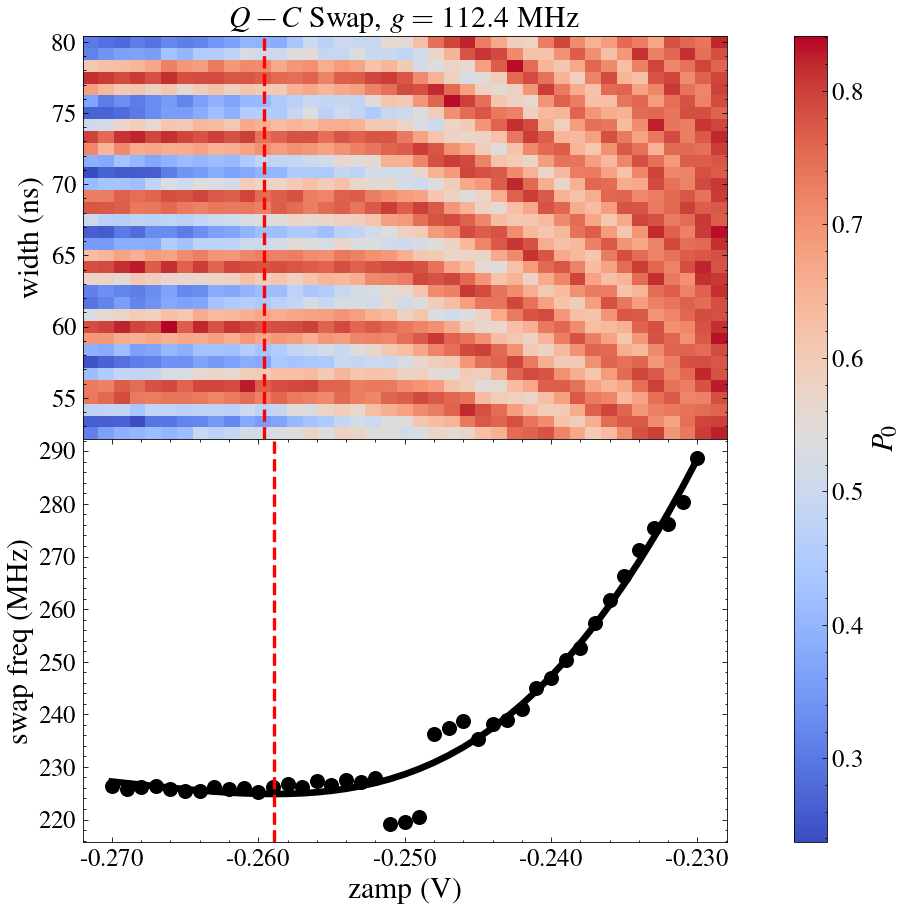

In [25]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-C$ Swap, $g={round(gmin * 1000, 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000)
ax1.plot(zamp_list, fun_swap(np.array(zamp_list)) * 1000)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

for ax in [ax0, ax1, cax]:
    ax.axvline(xmin, color='red', linestyle='--', linewidth=2)

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [26]:
g = gmin * 1000
wq = 4482
alphaq = -247.2
alphac = -120
amp = -0.20318
wc1 = amp2freq_formula(amp, *popt_wc_17_18)
print(wc1)
amp = freq2amp_formula(wq, *popt_wc_17_18)
wc2 = amp2freq_formula(amp, *popt_wc_17_18)
print(wc2)
rho_qc_18_17181 = g / np.sqrt((wq - alphaq) * (wc1 - alphac))
print(rho_qc_18_17181)
rho_qc_18_17182 = g / np.sqrt((wq - alphaq) * (wc2 - alphac))
print(rho_qc_18_17182)

4984.403040703344
4482.0
0.022882536837309606
0.024099239756009378


提取$q_{17},c_{11,17}$的耦合

In [27]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qhqc 1117'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [28]:
idx_min = zamp_list_all.index(-0.24)
idx_max = zamp_list_all.index(-0.223)
zamp_list = zamp_list_all[idx_max : idx_min]
P_arr = P_arr_all[idx_max : idx_min]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [29]:
zamp_list
osc_freq_list
xmin, gmin, _, fun_swap = fit_swap(np.array(zamp_list), osc_freq_list, fit_type='2order')

iter: 10000
rmse: 4.598275885598406e-07
popt: [-0.116995   39.46444186 28.79504359  4.56729401]
[-0.116995   39.46444186 28.79504359  4.56729401]


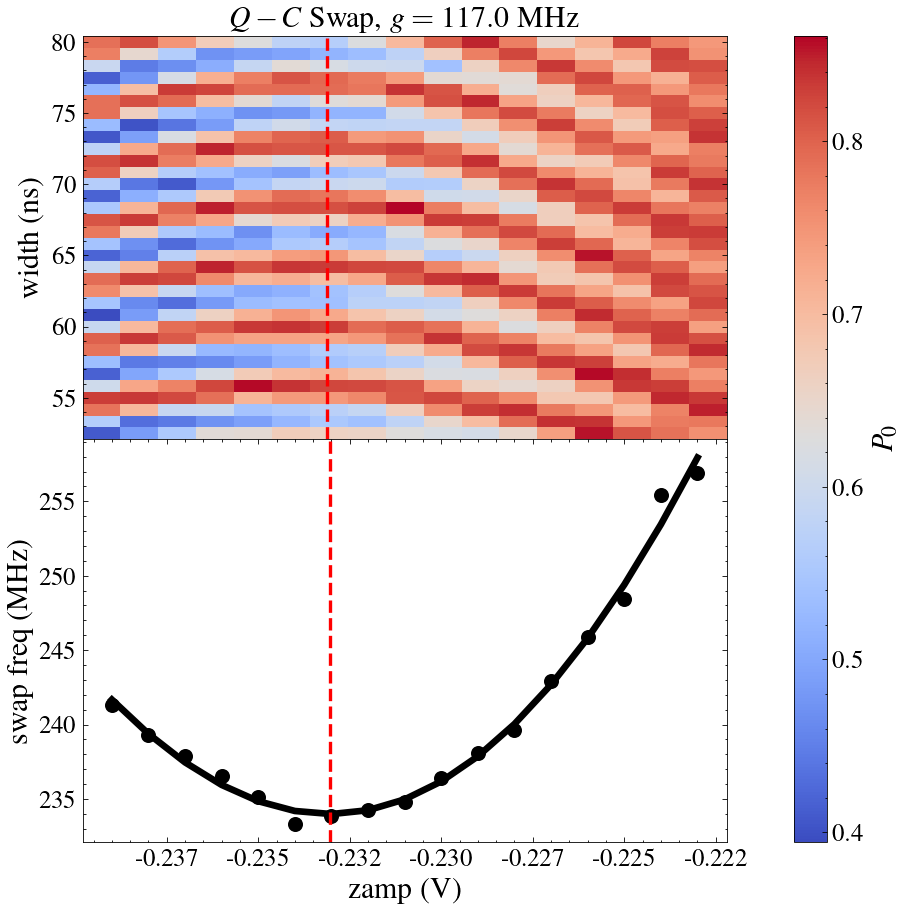

In [30]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-C$ Swap, $g={round(gmin * 1000, 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000)
ax1.plot(zamp_list, fun_swap(np.array(zamp_list)) * 1000)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

for ax in [ax0, ax1, cax]:
    ax.axvline(xmin, color='red', linestyle='--', linewidth=2)

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [31]:
g = gmin * 1000
wq = 4515.534
alphaq = -235.8
alphac = -119
amp = -0.213748
wc1 = amp2freq_formula(amp, *popt_wc_11_17)
print(wc1)
amp = freq2amp_formula(wq, *popt_wc_11_17)
wc2 = amp2freq_formula(amp, *popt_wc_11_17)
print(wc2)
rho_qc_17_11171 = g / np.sqrt((wq - alphaq) * (wc1 - alphac))
print(rho_qc_17_11171)
rho_qc_17_11172 = g / np.sqrt((wq - alphaq) * (wc2 - alphac))
print(rho_qc_17_11172)

4778.618938376963
4515.534
0.024253086822330204
0.024931963417780492


提取$q_{11},c_{11,17}$的耦合

In [32]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qlqc 1117'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [33]:
idx_min = zamp_list_all.index(-0.27)
idx_max = zamp_list_all.index(-0.240)
zamp_list = zamp_list_all[idx_max : idx_min]
P_arr = P_arr_all[idx_max : idx_min]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [34]:
zamp_list
osc_freq_list
xmin, gmin, _, fun_swap = fit_swap(np.array(zamp_list), osc_freq_list, fit_type='2order')

iter: 10000
rmse: 4.454332989030407e-06
popt: [ 0.10246359 97.53773874 53.66271099  7.3341933 ]
[ 0.10246359 97.53773874 53.66271099  7.3341933 ]


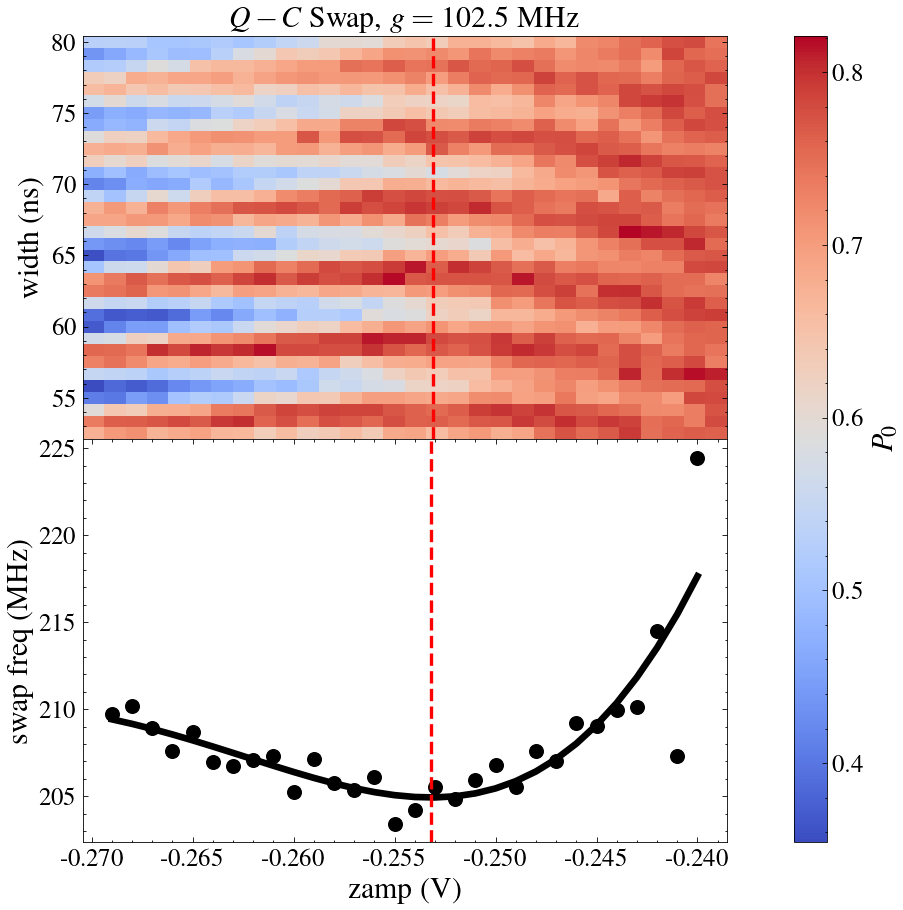

In [35]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-C$ Swap, $g={round(gmin * 1000, 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000)
ax1.plot(zamp_list, fun_swap(np.array(zamp_list)) * 1000)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

for ax in [ax0, ax1, cax]:
    ax.axvline(xmin, color='red', linestyle='--', linewidth=2)

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [36]:
g = gmin * 1000
wq = 4416
alphaq = -232.7
alphac = -119
amp = -0.213748
wc1 = amp2freq_formula(amp, *popt_wc_11_17)
print(wc1)
amp = freq2amp_formula(wq, *popt_wc_11_17)
wc2 = amp2freq_formula(amp, *popt_wc_11_17)
print(wc2)
rho_qc_11_11171 = g / np.sqrt((wq - alphaq) * (wc1 - alphac))
print(rho_qc_11_11171)
rho_qc_11_11172 = g / np.sqrt((wq - alphaq) * (wc2 - alphac))
print(rho_qc_11_11172)

4778.618938376963
4416.0
0.021473918754675515
0.022315938493741964


## QQ耦合

In [37]:
def get_ac_value(file_name):
    ac_index = file_name.find('ac=')
    space_index = file_name.find(' ', ac_index)
    return float(file_name[ac_index + 3: space_index])

$q_{11},q_{17}$之间的耦合

In [38]:
zamp_list_all = []
time_list = []
time_arr = []
P_arr_all = []
osc_freq_list = []

root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qhql 1117_变time'
folder_path1 = os.path.join(root_path, '20.26.41', r'child\SwapOnce')
folder_path2 = os.path.join(root_path, '20.38.44', r'child\SwapOnce')
folder_path3 = os.path.join(root_path, '20.52.21', r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path1 + '\\' + file_pattern) + glob.glob(
    folder_path2 + '\\' + file_pattern) + glob.glob(
        folder_path3 + '\\' + file_pattern)
# 遍历文件夹中的文件
sorted_files = sorted(file_list, key=get_ac_value)

for file_path in sorted_files:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[:, 0]
    time_arr.append(time_list)
    P_list = data[:, 3]
    P_arr_all.append(P_list)

In [39]:
zamp_list = zamp_list_all
P_arr = P_arr_all
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    time_list = time_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.


In [40]:
# 开放rho和w
def geff(x, g12, rho, w):
    x = np.asarray(x)
    # wc = rho * (x - w) ** 2
    wc = amp2freq_formula(x, *popt_wc_11_17)
#     wt = w
    wt = 1 / 2 * (w + wc - np.sqrt(4 * rho ** 2 * w * wc + (w - wc) ** 2))
    return abs(g12 + rho ** 2 * wt * wc * (1 / (wt - wc) - 1 / (wt + wc)))


def geff_fit(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    def error(paras, *args):
        x, y = args
        return geff(x, *paras) - y

    g120 = 15
    coe0 = 0.02  # 100
    d0 = 4400  # 1
    popt0 = [g120, coe0, d0]
    # popt, pcove = curve_fit(geff, x, y, p0=p0)
    num = 0
    rmse = np.inf
    while rmse > 1e-4 and num < 10000:
        popt, *_ = leastsq(error, x0=popt0, args=(x, y))
        popt0 = popt
        rmse = np.sum(error(popt, *(x, y)) ** 2) / len(x)
        num += 1
    print('num:', num)
    print('rmse:', rmse)
    return popt, lambda x: geff(x, *popt)

In [41]:
popt2, gfit = geff_fit(zamp_list, np.array(osc_freq_list[:]) * 1000 / 2)

num: 10000
rmse: 0.1418870159560971


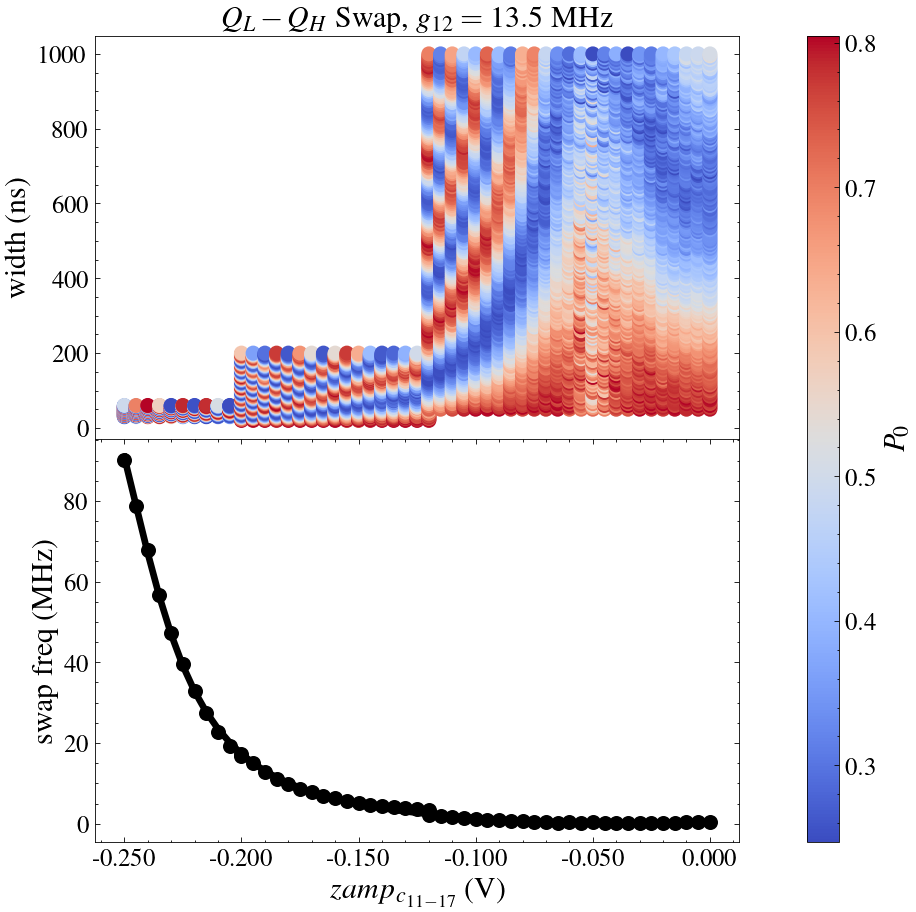

In [42]:
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
for i in range(len(zamp_list)):
    y = time_arr[i]
    x = np.ones_like(y) * zamp_list[i]
    z = P_arr[i]
    sc0 = ax0.scatter(x, y, c=z, cmap='coolwarm')
    
# c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(sc0, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q_L-Q_H$ Swap, $g_{{12}}={round(popt2[0],1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list)*1000/2)
ax1.plot(zamp_list[:], gfit(np.array(zamp_list[:])))

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'$zamp_{c_{11-17}}$ (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)
def format_func(value, tick_number):
    return f'{value:.3f}'

ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠


plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
)


In [43]:
g = popt2[0]
print(g)
wq1 = 4416
alphaq1 = -232.7
wq2 = 4416
alphaq2 = -235.8
rho_qq_1117 = g / np.sqrt((wq1 - alphaq1) * (wq2 - alphaq2))
rho_qq_1117

13.51515698971027


0.0029063292813228665

In [44]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qhql 1117'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [45]:
idx_min = zamp_list_all.index(-0.25)
idx_max = zamp_list_all.index(0)
zamp_list = zamp_list_all[idx_max : idx_min]
P_arr = P_arr_all[idx_max : idx_min]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [46]:
popt2, gfit = geff_fit(zamp_list, np.array(osc_freq_list[:]) * 1000 / 2)

num: 10000
rmse: 0.3510179306232483


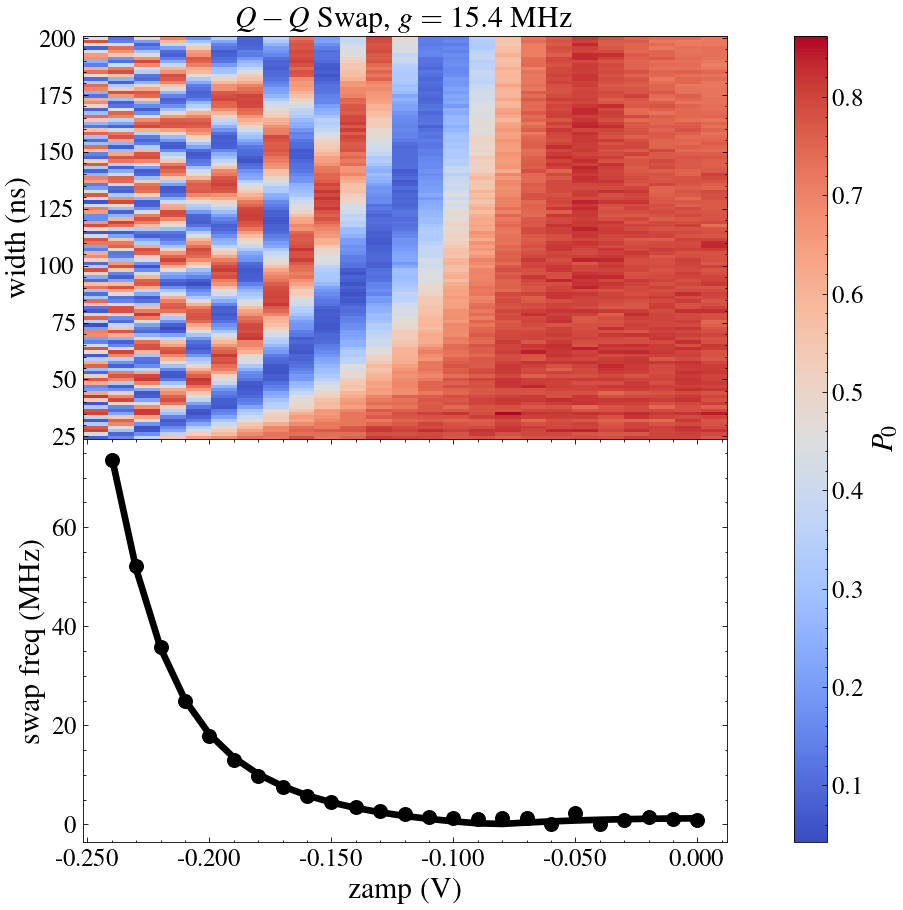

In [47]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-Q$ Swap, $g={round(popt2[0], 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000 / 2)
ax1.plot(zamp_list, gfit(np.array(zamp_list)))

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [48]:
g = popt2[0]
print(g)
wq1 = 4416
alphaq1 = -232.7
wq2 = 4416
alphaq2 = -235.8
rho_qq_1117 = g / np.sqrt((wq1 - alphaq1) * (wq2 - alphaq2))
rho_qq_1117

15.388617040177294


0.0033092022783739834

$q_{17},q_{18}$之间的耦合

In [49]:
zamp_list_all = []
time_list = []
time_arr = []
P_arr_all = []
osc_freq_list = []

root_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\qhql 1718_变time'
folder_path1 = os.path.join(root_path, '21.26.25', r'child\SwapOnce')
folder_path2 = os.path.join(root_path, '21.37.26', r'child\SwapOnce')
folder_path3 = os.path.join(root_path, '21.50.34', r'child\SwapOnce')
# folder_path4 = os.path.join(root_path, '22.07.55', r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path1 + '\\' + file_pattern) + glob.glob(
    folder_path2 + '\\' + file_pattern) + glob.glob(
    folder_path2 + '\\' + file_pattern) + glob.glob(folder_path3 + '\\' + file_pattern)
# 遍历文件夹中的文件
sorted_files = sorted(file_list, key=get_ac_value)

for file_path in sorted_files:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[:, 0]
    time_arr.append(time_list)
    P_list = data[:, 3]
    P_arr_all.append(P_list)

In [50]:
zamp_list = zamp_list_all
P_arr = P_arr_all
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    time_list = time_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [51]:
popt2, gfit = geff_fit(zamp_list, np.array(osc_freq_list[:]) * 1000 / 2)

num: 10000
rmse: 0.10264413595715874


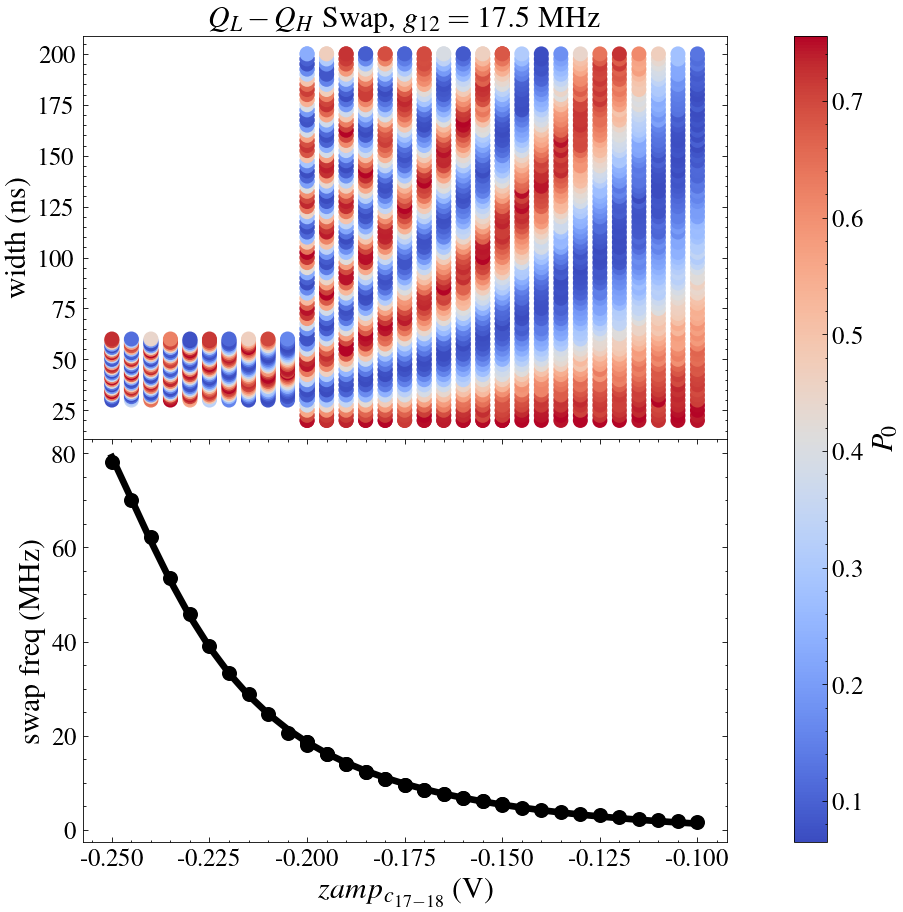

In [52]:
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
for i in range(len(zamp_list)):
    y = time_arr[i]
    x = np.ones_like(y) * zamp_list[i]
    z = P_arr[i]
    sc0 = ax0.scatter(x, y, c=z, cmap='coolwarm')
    
# c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(sc0, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q_L-Q_H$ Swap, $g_{{12}}={round(popt2[0],1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list)*1000/2)
ax1.plot(zamp_list[:], gfit(np.array(zamp_list[:])))

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'$zamp_{c_{17-18}}$ (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)
def format_func(value, tick_number):
    return f'{value:.3f}'

ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠


plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
)

In [53]:
g = popt2[0]
print(g)
wq1 = 4477.705
alphaq1 = -235.8
wq2 = 4482
alphaq2 = -247.2
rho_qq_1718 = g / np.sqrt((wq1 - alphaq1) * (wq2 - alphaq2))
rho_qq_1718

17.530728898025927


0.003713078638786075

In [54]:
zamp_list_all = []
time_list = []
P_arr_all = []
osc_freq_list = []
root_path = r'F:\OneDrive\vs experiment\coupler exp\实验数据\qhql 1718'
folder_path = os.path.join(root_path, r'child\SwapOnce')
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '\\' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    zamp = float(file_path.split('=')[-1].split(' - Swap')[0])  # 提取amp=后面的数字
    zamp_list_all.append(zamp)
    data = np.loadtxt(file_path)
    time_list = data[3:, 0]
    P_list = data[3:, 2]
    P_arr_all.append(P_list)

In [55]:
idx_min = zamp_list_all.index(-0.25)
idx_max = zamp_list_all.index(-0.1)
zamp_list = zamp_list_all[idx_max : idx_min]
P_arr = P_arr_all[idx_max : idx_min]
zamp_list = zamp_list_all[idx_min : idx_max]
P_arr = P_arr_all[idx_min : idx_max]
osc_freq_list = []
for i in range(len(zamp_list)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [56]:
popt2, gfit = geff_fit(zamp_list, np.array(osc_freq_list) * 1000 / 2)

num: 10000
rmse: 0.31049776192309325


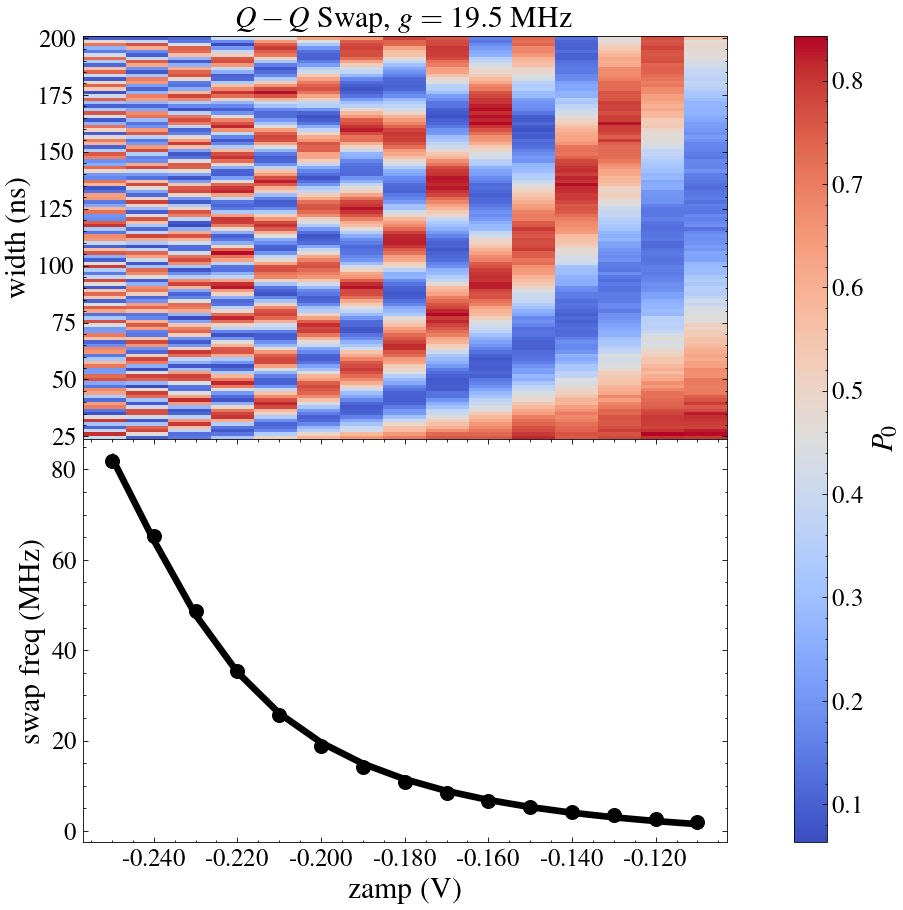

In [57]:
X, Y = np.meshgrid(zamp_list, time_list)
# 创建一个包含两个子图和colorbar的gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])

# 在gridspec中放置子图
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

# 在gridspec中放置colorbar
cax = plt.subplot(gs[:, 1])

# 绘制热图
norm = matplotlib.colors.LogNorm()
c = ax0.pcolormesh(X, Y, np.array(P_arr).T, cmap='coolwarm')
cb = plt.colorbar(c, cax=cax)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
cb.set_label(rf'$P_{0}$', fontdict=font)
cb.ax.tick_params(labelsize=15)
ax0.set_ylabel(r'width (ns)', fontdict=font)

ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

# 隐藏 axs[0] 的 x 轴标签
ax0.xaxis.set_visible(False)
ax0.set_title(f'$Q-Q$ Swap, $g={round(popt2[0], 1)}$ MHz', fontdict=font)

# 在 axs[1] 上绘制散点图和拟合曲线
ax1.scatter(zamp_list, np.array(osc_freq_list) * 1000 / 2)
ax1.plot(zamp_list, gfit(np.array(zamp_list)))

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# 设置 axs[1] 的 x 轴标签
ax1.set_xlabel(r'zamp (V)', fontdict=font)
ax1.set_ylabel(r'swap freq (MHz)', fontdict=font)


def format_func(value, tick_number):
    return f'{value:.3f}'


ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
# 调整布局，使得两个子图不会重叠

plt.subplots_adjust(hspace=0, top=0.95)

plt.savefig(
    os.path.join(root_path, 'swap.png')
    #     rf'F:\wangpeng\data\观察比特20240110\实验数据\qhqc 1718\qhqc 1718 swap.png'
)

In [58]:
g = popt2[0]
print(g)
wq1 = 4482
alphaq1 = -235.8
wq2 = 4482
alphaq2 = -247.2
rho_qq_1718 = g / np.sqrt((wq1 - alphaq1) * (wq2 - alphaq2))
rho_qq_1718

19.53365921714509


0.004135423613770632

## 读取修正文件处理

In [59]:
import os
import shutil

# 定义父文件夹路径
parent_folder = r'F:\wangpeng\data\观察比特20240110\实验数据\swap图\cs5500\child\SwapOnceSpectator'

# 定义新文件夹路径
new_folder = r'F:\wangpeng\data\观察比特20240110\实验数据\swap图\cs5500\child\SwapOnceSpectator\correct'
os.makedirs(new_folder, exist_ok=True)

# 遍历父文件夹
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)
    
    # 如果是文件夹
    if os.path.isdir(folder_path):
        # 遍历子文件夹中的文件
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.dat'):
                # 源文件路径
                source_file_path = os.path.join(folder_path, file_name)
                
                # 目标文件路径
                target_file_path = os.path.join(new_folder, folder_name + ' - ' + file_name)
                
                # 复制文件
                shutil.copy2(source_file_path, target_file_path)
                
                print(f'Copied: {source_file_path} -> {target_file_path}')


 ## 腔与coupler anticross耦合提取

In [60]:
def fit_swap(x, y, popt0=None, spec_paras=None, fit_type='2order'):
    if fit_type == '2order':
        # 如果没有给能谱参数，则使用二次函数关系近似
        #         func = lambda x,g,coe,offset: np.sqrt(4*g**2+(coe*x+offset)**2)
        def func(x, a, b, c, fr0, fc, g):
            delta = -fr0 + a * (x - b)**2 + c
            kai = g ** 2 / (delta * (1 - delta / fc))
            fr = fr0 - kai
            return fr


#         func = lambda x,g,a,b,c: np.sqrt(4*g**2 + (a*(x-b)**2+c)**2)

        if popt0 is None:
            a0 = -1
            b0 = 0.1
            c0 = 7000
            fr0_0 = 7081.141
            fc = 200
            g0 = 5

            popt0 = [a0, b0, c0, fr0_0, fc, g0]

        def error(paras, *args):
            a, b, c, fr0, fc, g = paras
            x, y = args
            return func(x, a, b, c, fr0, fc, g) - y

        num = 0
        rmse = np.inf
        while (rmse > 1e-9) and (num < 30000):
            popt, *_ = leastsq(error, x0=popt0, args=(x, y))
            popt0 = popt
            num += 1
            rmse = np.sum(error(popt, *(x, y))**2) / len(x)
        print('iter:', num)

        print('rmse:', np.sum(error(popt, *(x, y))**2) / len(x))
        print('popt:', popt)

        #         g, a, b,c = popt
        #         xmin = b
        #         gmin = abs(g)
        #         popt, pcove = curve_fit(func, x, y, p0=popt0)#, bounds=([-np.inf,0,-np.inf,-np.inf],[np.inf,np.inf,np.inf,0]))
        a, b, c, fr0, fc, g = popt
        #         xmin = (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)
        print(popt)
        #         gmin = abs(g)
        return popt, lambda x: func(x, *popt)

In [61]:
data = np.loadtxt(r'F:\OneDrive\vs experiment\coupler exp\实验数据\c170-71和腔\cavity_tunable.dat')
z_list = data[:, 0]
f_list = data[:, 1] * 1e3

z_list_top = data[48:, 0]
f_list_top = data[48:, 1] * 1e3
z_list_bottom = data[:42, 0]
f_list_bottom = data[:42, 1] * 1e3

In [62]:
p0 = [7500, 200, 1.6, 0.1, 0.3,7081.141,5]
param_bounds = [(7000, 10000), (-100000, 100000), (1., 2.2),
                (0.05, 0.2), (0, 1), (7081.1, 7081.6), (2, 15)]
upper = [bound[1] for bound in param_bounds]
lower = [bound[0] for bound in param_bounds]


popt_bottom, _ = scipy.optimize.curve_fit(flat_bottom_amp2freq_formula,
                                   z_list_bottom,
                                   f_list_bottom,
                                   p0=p0,
                                   bounds=(lower, upper),
                                   maxfev=100000,
                                   ftol=1.49012e-8,
                                   xtol=1.49012e-8)
popt_top, _ = scipy.optimize.curve_fit(flat_top_amp2freq_formula,
                                   z_list_top,
                                   f_list_top,
                                   p0=popt_bottom,
                                   bounds=(lower, upper),
                                   maxfev=100000,
                                   ftol=1.49012e-8,
                                   xtol=1.49012e-8)

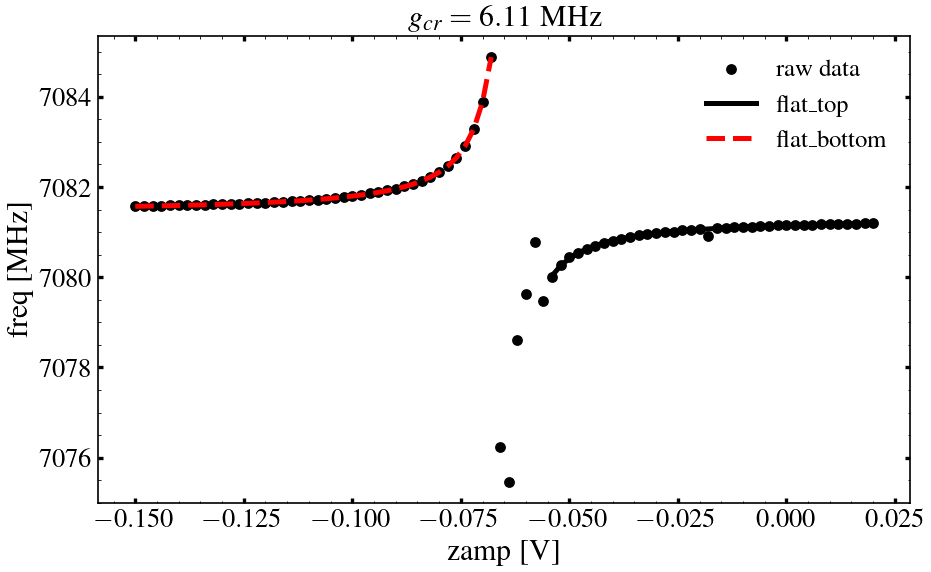

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
# ax.plot(np.linspace(-0.5,0.19,100), amp2freq_formula(np.linspace(-0.5,0.19,100), *popt), label='fit data')
ax.scatter(z_list, f_list, label='raw data', s=30,color='black')
ax.plot(z_list_top, flat_top_amp2freq_formula(z_list_top,*popt_top),label='flat_top',linewidth=3)
ax.plot(z_list_bottom, flat_bottom_amp2freq_formula(z_list_bottom,*popt_bottom),label='flat_bottom',linewidth=3)
# ax.plot(z_list_top, f_list_top)

ax.set_xlabel(r'zamp [V]', fontdict=font)
ax.set_ylabel(r'freq [MHz]', fontdict=font)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.tick_params(axis='both', which='major', width=2)  # 主刻度

spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

ax.legend(fontsize=15)
ax.set_title('$g_{cr}=6.11$ MHz',fontdict=font)
plt.tight_layout()

plt.savefig(
    r'F:\OneDrive\vs experiment\coupler exp\实验数据\c170-71和腔\cavity-coupler.png'
)

## z串扰拟合

In [448]:
from scipy.optimize import least_squares

def comp_wq2q_poly_v2(xqb_list, *popt):
    """
        a0, b0, c0: target qubit AC Spectrum parameters.
        a1, b1, c1: bias qubit AC Spectrum parameters.
        rho: qubit-coupler coupling strength.
        coe: AC Crosstalk coefficient.
        eigen: working point.
    """
    a0, b0, c0, a1, b1, c1, rho, coe, eigen = popt
    wqb = a1*xqb_list**2 + b1*xqb_list + c1  # a1*(xqb_list-b1)**2 + c1

    wqt = (eigen**2 - eigen*wqb) / (rho**2*wqb - wqb + eigen)

    xqt = b0+np.sqrt(np.abs((wqt-c0)/a0)) - coe*xqb_list 
    return xqt

def comp_wq2q_fit_v2(xqb_list, xqt_list, eigen=4):
    def error(paras, *args):
        x, y = args
        return (comp_wq2q_poly_v2(x, *paras) - y)

#     popt0 = [-4e+03,  0,  15e3, -6e+02,  0,  7e3, 0.01, 0.03, eigen]
    popt0 = [-2,  -0.1,  4.5, -2,  -0.55,  6.5, 0.03, 0.001, eigen]
    num = 0; rmse = np.inf
    while rmse > 1e-7 and num < 1000:
    #         popt, *_ = leastsq(error, x0=popt0, args=(xqb_list, xqt_list))
        res = least_squares(error, x0=popt0, args=(xqb_list, xqt_list),
                            bounds=([-np.inf, -np.inf, 0, 
                                     -np.inf, -np.inf, 0, 
                                     0, -0.1, eigen-0.08],
                                    [0, np.inf, np.inf, 
                                     0, np.inf, np.inf, 
                                     np.inf, 0.1, eigen+0.08]))
        popt = res.x
        rmse = np.sqrt(np.sum(error(popt, *(xqb_list, xqt_list))**2)) / len(xqt_list)
        num += 1
        popt0 = popt
#     print('iter:', num)
    print('rmse:', rmse)
    print('popt:', popt)
    return popt, lambda xqb: comp_wq2q_poly_v2(xqb, *popt)

In [354]:
#
from scipy.optimize import least_squares


def comp_wq2q_poly_v2(xqb_list, *popt):
    """
        a0, b0, c0: target qubit AC Spectrum parameters.
        a1, b1, c1: bias qubit AC Spectrum parameters.
        rho: qubit-coupler coupling strength.
        coe: AC Crosstalk coefficient.
        eigen: working point.
    """
    a0, b0, c0, rho, coe, eigen = popt
    wqb = amp2freq_formula(xqb_list, *popt_wc)

    wqt = (eigen**2 - eigen * wqb) / (rho**2 * wqb - wqb + eigen)

    xqt = b0 + np.sqrt(np.abs((wqt - c0) / a0)) - coe * xqb_list
    return xqt


def comp_wq2q_fit_v2(xqb_list, xqt_list, eigen=4):

    def error(paras, *args):
        x, y = args
        return (comp_wq2q_poly_v2(x, *paras) - y)

#     popt0 = [-4e+03,  0,  15e3, -6e+02,  0,  7e3, 0.01, 0.03, eigen]

    popt0 = [3000, -0.1, 4500, 0.03, 0.001, eigen]
    num = 0
    rmse = np.inf
    while rmse > 1e-7 and num < 1000:
        #         popt, *_ = leastsq(error, x0=popt0, args=(xqb_list, xqt_list))
        res = least_squares(
            error,
            x0=popt0,
            args=(xqb_list, xqt_list),
            bounds=([0, -np.inf, -np.inf, 0, -0.1,eigen - 80], 
                    [np.inf, np.inf, np.inf, 0.1, 0.1, eigen + 80]))
        popt = res.x
        rmse = np.sqrt(np.sum(error(popt, *(xqb_list, xqt_list))**
                              2)) / len(xqt_list)
        num += 1
        popt0 = popt


#     print('iter:', num)
    print('rmse:', rmse)
    print('popt:', popt)
    return popt, lambda xqb: comp_wq2q_poly_v2(xqb, *popt)

In [352]:
popt_wq = [4416.70317274, -70.28073918, 1.95460433, 0.10340478, -0.78171328] #q11

In [480]:
root_path = r'E:\wangpeng\data\20231127 72bitV9.2.3 @ Y4\Y4-231011-设计验证-72bit_300pin_V9.2.3_Base-3#\ACCrosstalk\bq(c17-18)-tq(q18)\ACCrosstalkFixF\2024-02-20\23.54.31'
# folder_path = os.path.join(root_path, '21.26.25', r'child\SwapOnce')
fitdata = np.loadtxt(os.path.join(root_path, 'bqv-tqv.dat'))
zclist = np.hstack((fitdata[:10, 0] , fitdata[10:-25,0]))
z1list = np.hstack((fitdata[:10, 1]-4.2e-4 , fitdata[10:-25, 1]))

In [481]:
popt, func_wq2q = comp_wq2q_fit_v2(zclist, z1list, eigen=4.147)

rmse: 1.0620903268510632e-05
popt: [-1.89152516e+00 -5.92540814e-01  3.55425130e+00 -2.27341456e+00
 -2.88614174e+00  3.59501190e+00  1.13395528e-02  3.87474102e-03
  4.20271073e+00]


<IPython.core.display.Javascript object>


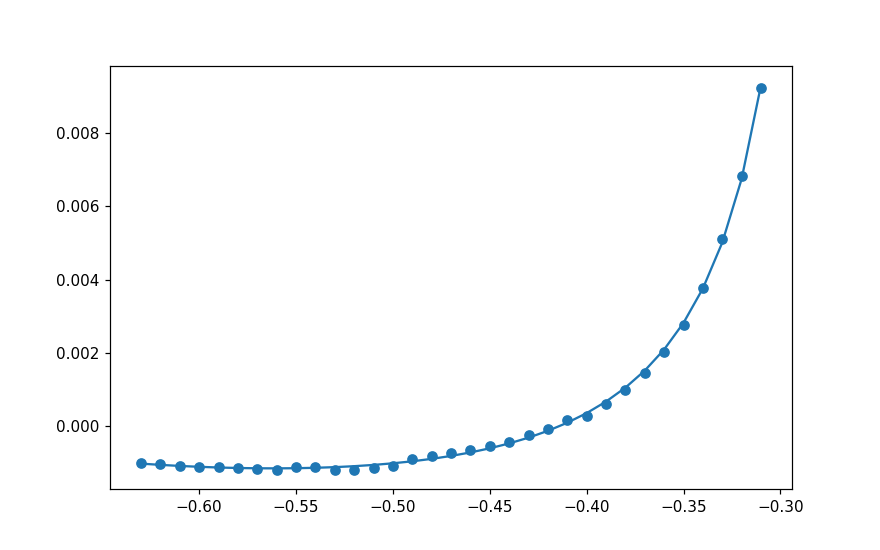

In [482]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(zclist, z1list)
ax.plot(zclist, func_wq2q(np.array(zclist)))

<IPython.core.display.Javascript object>


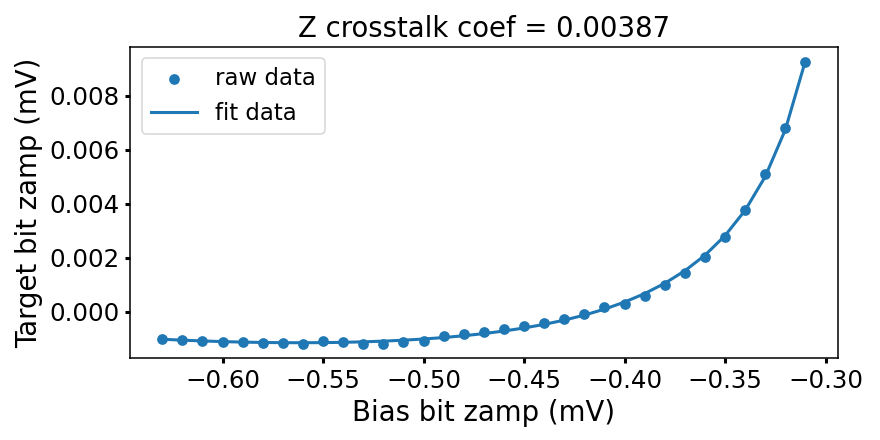

In [485]:
font = {'size': 18}

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(zclist, z1list, label='raw data')
ax.plot(zclist, func_wq2q(np.array(zclist)),linewidth=2, label='fit data')
# ax.plot(depths,
#         rb_exponential_decay_func(np.array(depths), *fidelity_max_fit),
#         linewidth=2,
#         color='orange')


ax.set_xlabel(r'Bias bit zamp (mV)', fontdict=font)
ax.set_ylabel(r'Target bit zamp (mV)', fontdict=font)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.tick_params(axis='both', which='major', width=2)  # 主刻度

spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

ax.set_title(f'Z crosstalk coef = {round(popt[-2],5)}', fontdict=font)
ax.legend(fontsize=15)
plt.tight_layout()

plt.savefig(os.path.join(root_path, rf'Z串扰.png'))

#  耦合 and swap图像

## 耦合图像

In [64]:
freq_z_list = []
xy_freq_list = []
P_arr = []

folder_path = r'F:\OneDrive\vs experiment\coupler exp\实验数据\能谱图\cs6250\child'
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '/QubitSpectrumExtend/' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    freq_z = float(file_path.split('=')[-1].split(' - Q')[0])  # 提取amp=后面的数字
    freq_z_list.append(freq_z)
    data = np.loadtxt(file_path)
    xy_freq_list = data[:, 0]
    P_arr.append(data[:, 2])

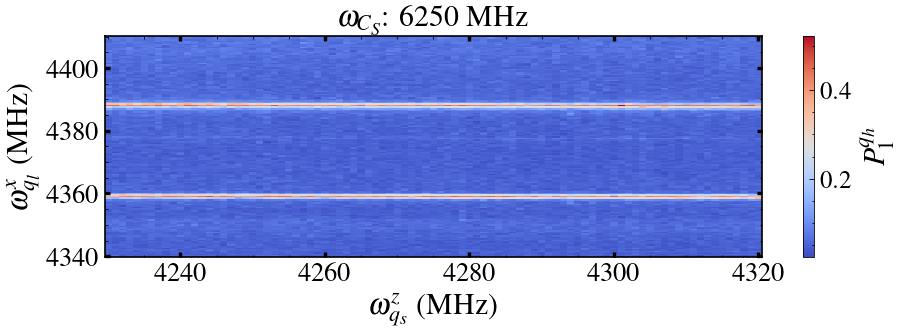

In [65]:
# P_arr_sort = []

# sorted_pairs = sorted(zip(z_freq_list, P_arr), reverse=True)
# z_freq_list_sort, P_arr_sort = zip(*sorted_pairs)

X, Y = np.meshgrid(freq_z_list, xy_freq_list)
fig, ax = plt.subplots(figsize=(8, 3))
norm = matplotlib.colors.LogNorm()

c = ax.pcolormesh(X , Y , np.array(P_arr).T, cmap='coolwarm')
# ax.axvline(x=3.992, linestyle=':', color='red', linewidth=3)   
# ax.axvline(x=4.033, linestyle=':', color='red', linewidth=3)   

cb = plt.colorbar(c, ax=ax)
font = {'size': 18}
cb.set_label(r'$P^{q_h}_{1}$', fontdict=font)
ax.set_xlabel(r'$\omega^z_{q_s}$ (MHz)', fontdict=font)
ax.set_ylabel(r'$\omega^x_{q_l}$ (MHz)', fontdict=font)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='both', which='major', width=2)  # 主刻度

cb.ax.tick_params(labelsize=15)

spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

# CS = ax.contour(X, Y, X, [4216.8],norm=norm, colors='red')
# ax.clabel(CS, inline=True, fontsize=12)
ax.set_title(r'$\omega_{C_S}$: 6250 MHz', fontdict=font)
plt.tight_layout()
time = datetime.now().strftime('%m%d-%H.%M.%S')

plt.savefig(os.path.join(folder_path, rf'能级图.png'))

In [71]:
freq_z_list = []
xy_freq_list = []
P_arr = []

folder_path = r'F:\OneDrive\vs experiment\coupler exp\实验数据\能谱图\cs5500'
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '/QubitSpectrumExtend/' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    freq_z = float(file_path.split('=')[-1].split(' - Q')[0])  # 提取amp=后面的数字
    freq_z_list.append(freq_z)
    data = np.loadtxt(file_path)
    xy_freq_list = data[:, 0]
    P_arr.append(data[:, 2])

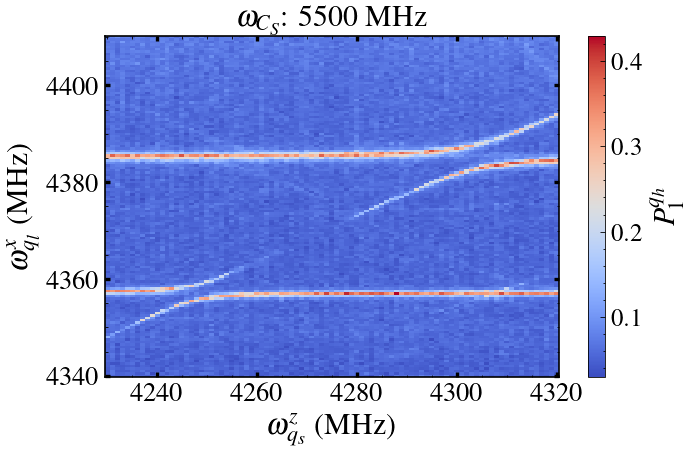

In [73]:
# P_arr_sort = []

# sorted_pairs = sorted(zip(z_freq_list, P_arr), reverse=True)
# z_freq_list_sort, P_arr_sort = zip(*sorted_pairs)

X, Y = np.meshgrid(freq_z_list, xy_freq_list)
fig, ax = plt.subplots(figsize=(6, 4))
norm = matplotlib.colors.LogNorm()

c = ax.pcolormesh(X , Y , np.array(P_arr).T, cmap='coolwarm')
# ax.axvline(x=3.992, linestyle=':', color='red', linewidth=3)   
# ax.axvline(x=4.033, linestyle=':', color='red', linewidth=3)   

cb = plt.colorbar(c, ax=ax)
font = {'size': 18}
cb.set_label(r'$P^{q_h}_{1}$', fontdict=font)
ax.set_xlabel(r'$\omega^z_{q_s}$ (MHz)', fontdict=font)
ax.set_ylabel(r'$\omega^x_{q_l}$ (MHz)', fontdict=font)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='both', which='major', width=2)  # 主刻度

cb.ax.tick_params(labelsize=15)

spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

# CS = ax.contour(X, Y, X, [4216.8],norm=norm, colors='red')
# ax.clabel(CS, inline=True, fontsize=12)
ax.set_title(r'$\omega_{C_S}$: 5500 MHz', fontdict=font)
plt.tight_layout()
time = datetime.now().strftime('%m%d-%H.%M.%S')

plt.savefig(os.path.join(folder_path, rf'能级图.png'))

## swap图像

In [3]:
ac_spectrum_q = [4482.37212699, -83.72132787, 1.52079749, 0.21826088, -0.79721918]
ac_spectrum_q[-2] = 0

In [4]:
P_arr_dic = dict()
for i in range(8):
    print(bin(i)[2:].zfill(3))
    P_arr_dic[bin(i)[2:].zfill(3)] = []

000
001
010
011
100
101
110
111


In [5]:
q_amp_list = []
time_list = []
P_arr = []
for i in range(4):
    P_arr_dic[bin(i)[2:].zfill(3)] = []
folder_path = r'F:\OneDrive\vs experiment\coupler exp\实验数据\swap图\cs5500'
file_pattern = '*.dat'
file_list = glob.glob(folder_path + '/child/SwapOnceSpectator/correct/' + file_pattern)
# 遍历文件夹中的文件
for file_path in file_list:
    q_amp = float(file_path.split('=')[-1].split(' - correct')[0])  # 提取amp=后面的数字
    q_amp_list.append(q_amp)
    data = np.loadtxt(file_path)
    time_list = data[:, 0]
    
    P_arr.append(data[:, 6])

In [9]:
q_freq_list = [
    amp2freq_formula(-0.217842 + q_amp, *ac_spectrum_q)
    for q_amp in q_amp_list
]
P_arr_dic_sort = {}
sorted_pairs = sorted(zip(q_freq_list, P_arr),
                      reverse=False)
q_freq_list_sort, P_arr = zip(*sorted_pairs)

In [13]:
P_name = '110'

X, Y = np.meshgrid(q_freq_list_sort, time_list)
fig, ax = plt.subplots()
norm = matplotlib.colors.LogNorm()
c = ax.pcolormesh(X * 1e-3,
                  Y,
                  np.array(P_arr).T,
                  cmap='coolwarm')
cb = plt.colorbar(c, ax=ax)
font = {'size': 18}
cb.set_label(rf'$P_{{{P_name}}}$', fontdict=font)
ax.set_xlabel(r'$\omega_{s}$ (GHz)', fontdict=font)
ax.set_ylabel(r'width (ns)', fontdict=font)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='both', which='major', width=2)  # 主刻度


cb.ax.tick_params(labelsize=15)
spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

# CS = ax.contour(X, Y, X, [4216.8],norm=norm, colors='red')
# ax.clabel(CS, inline=True, fontsize=12)
title = r'long swap'
ax.set_title(title, fontsize=18)
plt.tight_layout()
title = 'long swap.pdf'
output_path = Path.cwd()/ 'figures' / title
plt.savefig(output_path, dpi=300)
plt.close()

In [79]:
osc_freq_list = []
for i in range(len(q_freq_list_sort)):
    P_list = P_arr[i]
    osc_freq = fit_cos(time_list, P_list)[0][0]

    osc_freq_list.append(osc_freq)

In [80]:
theory_osc_freq_1 = [9.621811552631423, 9.15390596696941, 8.689542358202221, 8.229335824821767, 7.774051065885859, 7.324652666869167, 6.882350540427489, 6.448614418786841, 6.025228452739997, 5.614358547521137, 5.2188318989513025, 4.842620817221825, 4.490955053205127, 4.169680343503683, 3.8860670558856643, 3.6495891990293696, 3.469221110293975, 3.3544122923796698, 3.3119526915425173, 3.3445121870546854, 3.450019242392383, 3.622157807170935, 3.851797697066819, 4.129595881352321, 4.446347636961459, 4.794561374390239, 5.1675275581272055, 5.560425683336481, 5.969705572270832, 6.392126913743672, 6.824875064241102, 7.265726280421848, 7.713254704644523, 8.166584524570307, 8.625141161452833, 9.08850721129894, 9.556212195354814, 10.027600975219983, 10.501831299539345, 18.21835978464252, 17.74140818474448, 17.267296811964034, 16.795838586397178, 16.326715671056032, 15.859820214111327, 15.39620964240687, 14.94224603034662, 14.37860460644776, 13.96148522047275, 13.506695961225526, 13.0487279313769, 12.592000283831897, 12.13817729870064, 11.688284823748797, 11.243040931001916, 10.802996360687038, 10.368561536834045, 9.940103440313122, 9.518266243797262, 9.104113557163712, 8.699086650129832, 8.304641759895208, 7.922102029659251, 7.553048670298303, 7.199872235428672, 6.8651652625336546, 6.551316304882065, 6.26181422436078, 6.0000745193646825, 5.769848425476736, 5.5750431078473115, 5.419611359867932, 5.306824570417723, 5.2395059433667255, 5.219454000420741, 5.24720671705465, 5.322015301405872, 5.441891536253498, 5.603921717321851, 5.804735021235886, 6.040269861756454, 6.306805233447584, 6.6004051044290275, 6.917860258958201, 7.255808073460323, 7.611596135874012, 7.982965951326035, 8.367733558559678, 8.764057700299983, 9.17049879654664, 9.585840824582082]
theory_osc_freq_2 = [9.731332649733321, 9.26909513106312, 8.810975729311256, 8.357638880770844, 7.909901516433911, 7.468778863700814, 7.035529177044015, 6.6117176382327925, 6.199299327340771, 5.800702626858858, 5.4189474146349665, 5.0578334082555365, 4.722094114615921, 4.417572599072054, 4.1511209373142846, 3.930448585494165, 3.7636651837608475, 3.6581653470226763, 3.6192606090570028, 3.6490896734092573, 3.7459832290493287, 3.9049846590336212, 4.119063416891982, 4.379739829641578, 4.67979457433778, 5.0116911171155, 5.369467149819412, 5.748899833558254, 6.145780058623767, 6.5564682453483005, 6.978401486259302, 7.4099564598292025, 7.849852991966248, 8.296956258338032, 8.750097095106149, 9.208141965843947, 9.670104525399072, 10.135132080038499, 10.602500741543247, 11.071665187157317, 11.542311095893298, 12.014356769310947, 12.487888944824524, 16.06092441198177, 15.578432905214642, 15.097084053615001, 14.531569583827144, 14.115535401596352, 13.644928689152872, 13.170555447267375, 12.697482864007368, 12.226811061270446, 11.759077777407326, 11.294678987647336, 10.833936517457868, 10.377095118202565, 9.924381252238375, 9.47614457527902, 9.032947769935769, 8.595605964364633, 8.165272911473837, 7.743379614705683, 7.331511529350717, 6.931350454898687, 6.544805243337982, 6.174450035464032, 5.82361588595782, 5.495929870838188, 5.195672215039176, 4.928073893513066, 4.698485536176293, 4.512910529082466, 4.376857614913782, 4.295007583746123, 4.270524556637902, 4.304397549267462, 4.395261005899993, 4.5396418297533865, 4.732729121630593, 4.968840396445388, 5.242091821435396, 5.547052481002328, 5.87886150024337, 6.233032193680269, 6.606104487339961, 6.995138272071069, 7.397523092514348, 7.811123424431517, 8.234259311907977, 8.66559564899518, 9.104002156736053]
sim_osc_freq = [9.572875751989441, 9.115377926081631, 8.658594242711752, 8.205050319146986, 7.7602908224412195, 7.32569433349903, 6.8951522951600115, 6.469136617499168, 6.054979482063655, 5.652157586934129, 5.266993967202201, 4.892014871937127, 4.550667466236048, 4.2303589619292, 3.9500255118876204, 3.711870118198808, 3.523657714797679, 3.395700838591779, 3.336203549114072, 3.3476003090194717, 3.4282690199484023, 3.577054151972914, 3.7822649991058603, 4.0349440800439735, 4.328766883096476, 4.650918245781325, 5.003824028380628, 5.373339187838408, 5.771515722798018, 6.171266380487175, 6.585265278190352, 7.00877216556635, 7.438002761447697, 7.873721638103236, 8.314751414509104, 8.761139710186939, 9.211583813191686, 9.66263530216088, 10.114179662333205, 10.570894133620673, 11.034031534789644, 11.497837939496048, 11.952377848310213, 15.925735970852203, 15.474374400427429, 15.010475096811989, 14.538409713256781, 14.149832585879723, 13.604374197298924, 13.15668031806311, 12.7208761307718, 12.283190133199128, 11.840181673100808, 11.395795709034875, 10.955592783656424, 10.526869689107485, 10.106026267426515, 9.681986900677469, 9.267650633655602, 8.865024769612782, 8.457610051710896, 8.074691716116222, 7.6950696251086, 7.333546558834279, 6.984514195815415, 6.652507723746314, 6.341513662530284, 6.053565710438699, 5.7922908034816984, 5.563576373463018, 5.365541200486743, 5.2092628944149135, 5.098879965022893, 5.030044127150106, 5.008436246561046, 5.035897523099625, 5.109710612777156, 5.227646487784848, 5.387512341085391, 5.589424585977802, 5.823856139814975, 6.087934458905368, 6.37874706209937, 6.690678108006575, 7.025036889679131, 7.3787259406245, 7.7483065749700195, 8.128364442965621, 8.51891120563368, 8.922267920358927, 9.32904345811002]

fig path: f:\OneDrive\vs experiment\coupler exp\figures\2024-03\0315-12.47.54_oscfreq.pdf.png


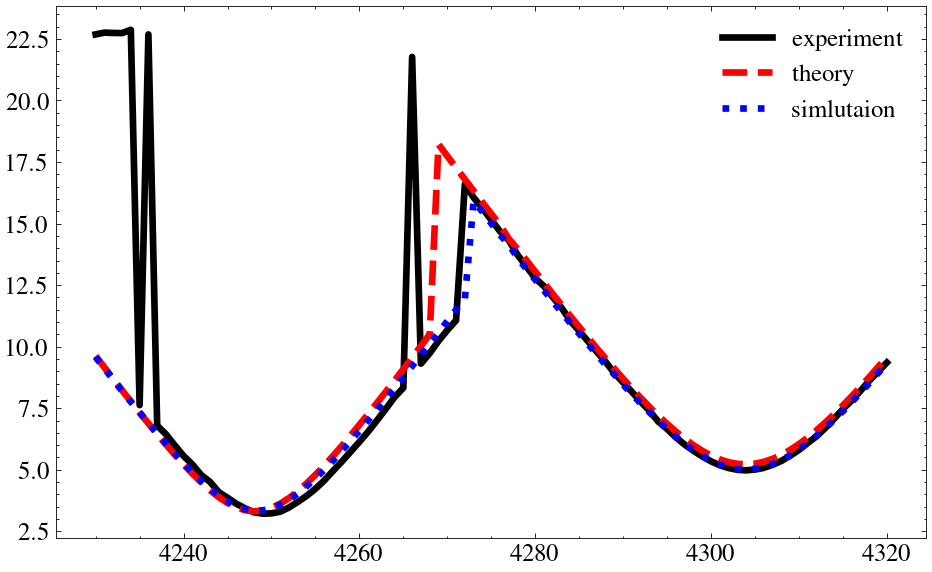

In [81]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(q_freq_list_sort, np.array(osc_freq_list) * 1000 / 2, label='experiment')
ax.plot(q_freq_list_sort, theory_osc_freq_1, label='theory')
ax.plot(q_freq_list_sort, sim_osc_freq, label='simlutaion')
ax.legend(fontsize=15)
ploter.save_fig(fig, 'oscfreq.pdf')

fig path: f:\OneDrive\vs experiment\coupler exp\figures\2024-03\0315-12.48.01_oscfreq.pdf.png


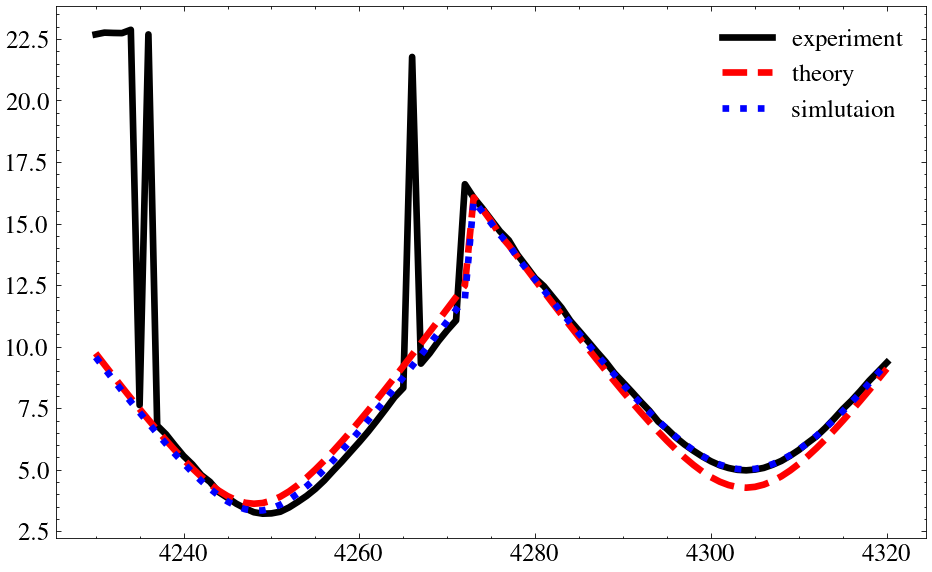

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(q_freq_list_sort, np.array(osc_freq_list) * 1000 / 2, label='experiment')
ax.plot(q_freq_list_sort, theory_osc_freq_2, label='theory')
ax.plot(q_freq_list_sort, sim_osc_freq, label='simlutaion')
ax.legend(fontsize=15)
ploter.save_fig(fig, 'oscfreq.pdf')

# 保真度

## 打开/关断XEB保真度对比

In [4]:
dir_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\XEB保真度\20240212'
file_name = os.path.join(dir_path, r'xeb_sweep_qs_all.json')
with open(
        file_name,
        "r",
        encoding="utf-8",
) as file:
    content = file.read()
    data = json.loads(content)
    file.close()

In [5]:
#
dir_path = r'F:\onedrive\vs experiment\coupler exp\实验数据\XEB保真度\20240212'
file_name = os.path.join(dir_path, r'xeb_sweep_qs.json')
with open(
        file_name,
        "r",
        encoding="utf-8",
) as file:
    content = file.read()
    data1 = json.loads(content)
    file.close()

In [6]:
for freq in data1:
    print(freq)
    data[freq] = data1[freq]

4230
4240
4250
4255
4260
4265
4270
4280
4320
4325
4330


In [7]:
with open(os.path.join(dir_path, r'xeb_sweep_qs_all.json'), mode="w", encoding="utf-8") as fp:
    json.dump(
        data, fp, indent=4, ensure_ascii=False
    )

In [8]:
def xeb_fit(x, y):
    baseline = np.mean(y)
    amp = y[0] - baseline

    amp0 = amp
    base0 = 0.9
    baseline0 = baseline

    p0 = [amp0, base0, baseline0]
    popt, _ = scipy.optimize.curve_fit(rb_exponential_decay_func,
                                       x,
                                       y,
                                       p0=p0,
                                       maxfev=100000,
                                       ftol=1.49012e-8,
                                       xtol=1.49012e-8)
    return popt


def cal_fidelity(base):
    """Calculating single qubit gate fidelity

    Args:
        ana_data: AnalysisData

    Returns:
        rc: Average clifford individual error rate
        rg: Average single qubit gate error rate
        fidelity: Average single qubit fidelity
    """
    _p = base
    _ra = (1 - _p) * (1 - 1 / 2)
    _rp = (3 / 2) * _ra
    return _ra

In [ ]:
def xeb_plot(depths, fidelity_max_mean, fidelity_max_std, fidelity_off_mean,
             fidelity_off_std, fidelity_max_fit, fidelity_off_fit,
             error_max_mean, error_max_std, error_off_mean, error_off_std,
             qs_freq):
    font = {'size': 18}

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.errorbar(depths,
                fidelity_max_mean,
                fidelity_max_std,
                fmt='o',
                capsize=3,
                color='orange',
                label=f'$C_s$ Max: {error_max_mean} $\pm$ {error_max_std}%')
    ax.plot(depths,
            rb_exponential_decay_func(np.array(depths), *fidelity_max_fit),
            linewidth=2,
            color='orange')

    ax.errorbar(depths,
                fidelity_off_mean,
                fidelity_off_std,
                fmt='o',
                capsize=3,
                color='blue',
                label=f'$C_s$ Off: {error_off_mean} $\pm$ {error_off_std}%')
    ax.plot(depths,
            rb_exponential_decay_func(np.array(depths), *fidelity_off_fit),
            linewidth=2,
            color='blue')

    ax.set_xlabel(r'Number of cycles', fontdict=font)
    ax.set_ylabel(r'XEB Fidelity', fontdict=font)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.tick_params(axis='both', which='major', width=2)  # 主刻度

    spines = ax.spines

    # 设置四个边框线的宽度
    for spine in spines.values():
        spine.set_linewidth(1.)  # 设置线宽为2

    ax.set_title(f'Qs freq = {qs_freq}MHz', fontdict=font)
    ax.legend(fontsize=15, title='XEB CZ Error', title_fontsize=15)
    plt.tight_layout()
    path_name = os.path.join(dir_path,'fig_single', rf'qs={qs_freq}xeb对比.png')
    os.makedirs(os.path.dirname(path_name), exist_ok=True)
    plt.savefig(path_name)

0.15
0.16
0.17
0.17
0.16
0.15
0.16
0.19
0.15
0.16
0.16
0.19
0.16
0.17
0.16
0.22
0.15
0.15
0.13
0.2
0.21
0.18
0.18


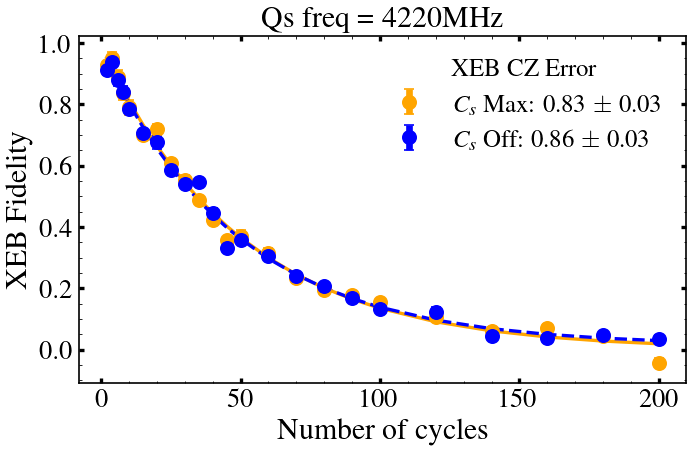

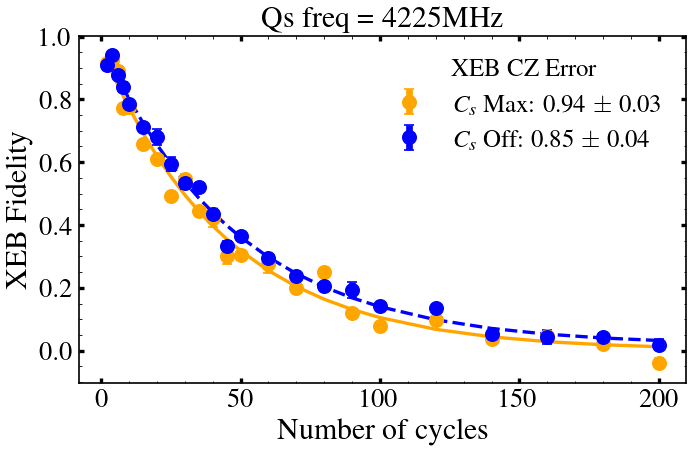

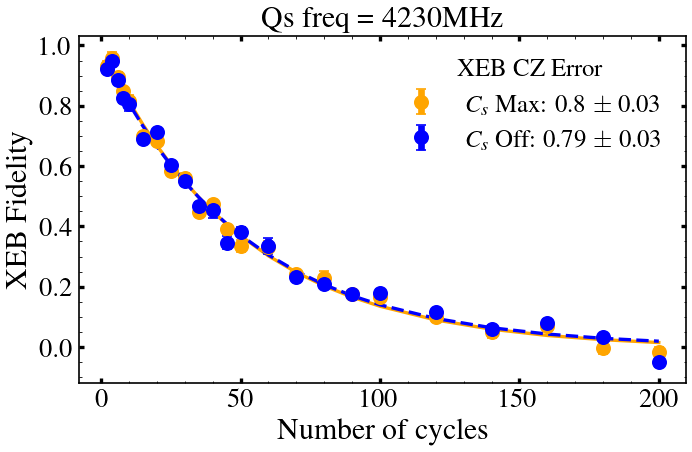

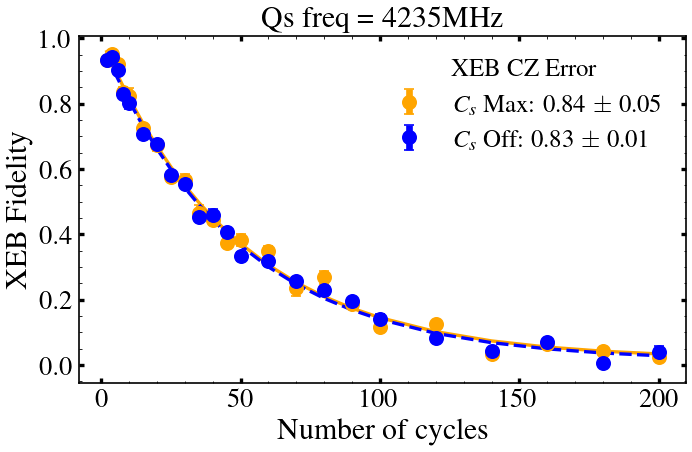

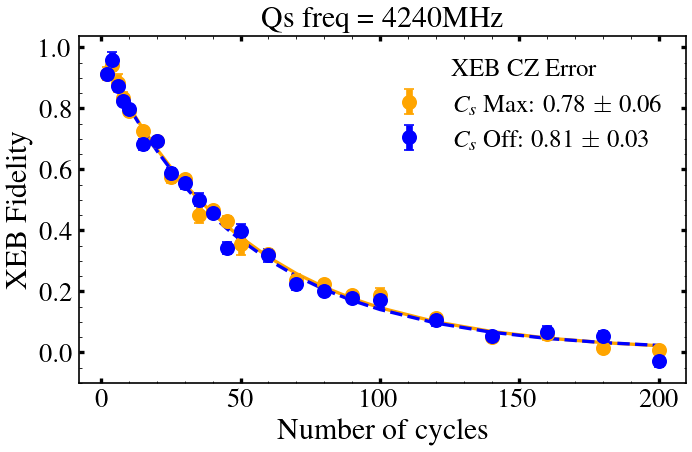

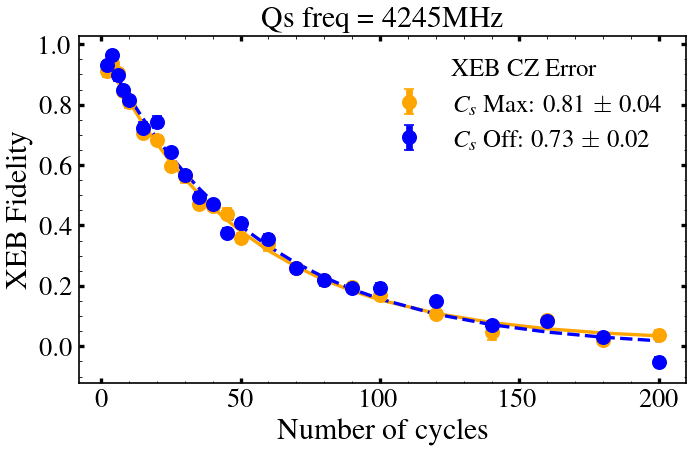

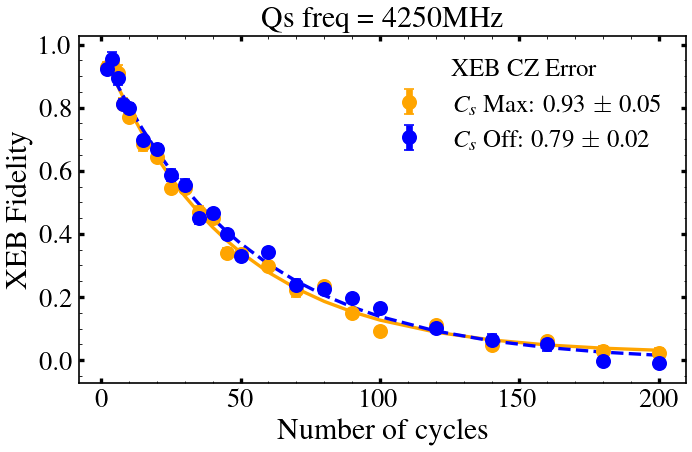

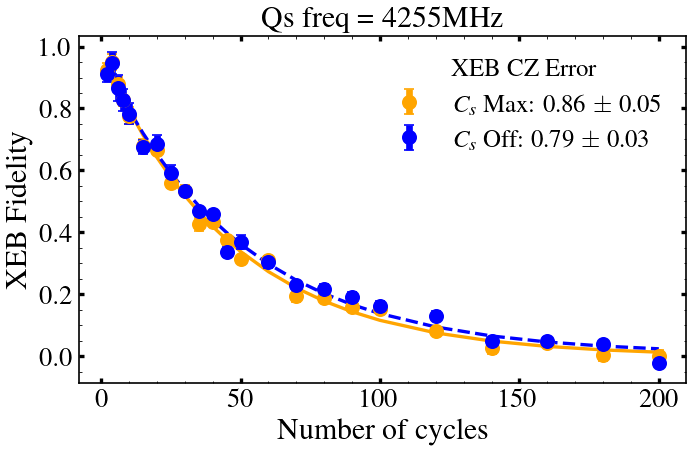

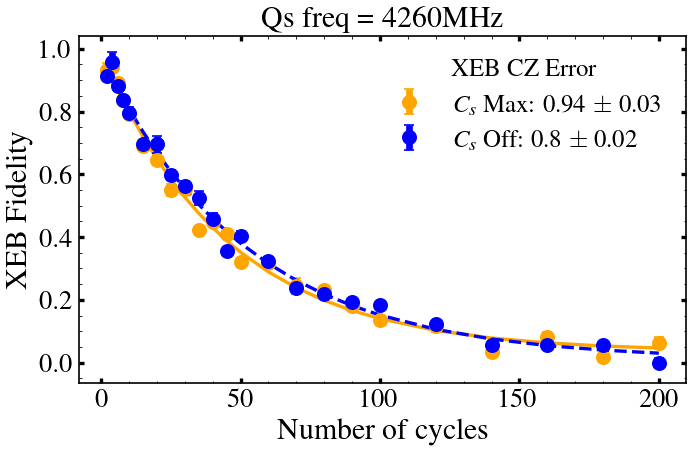

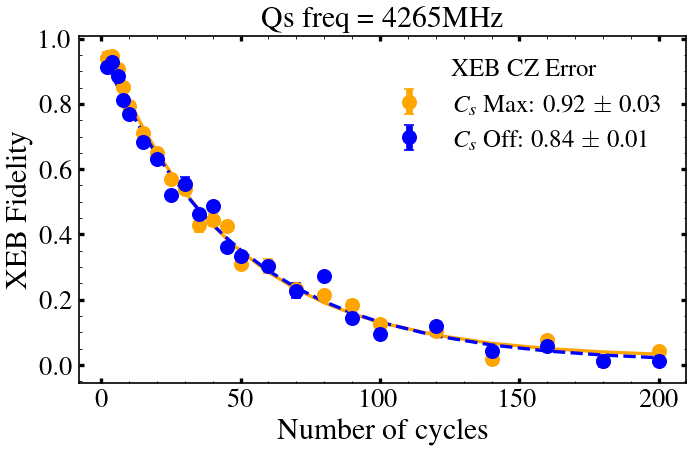

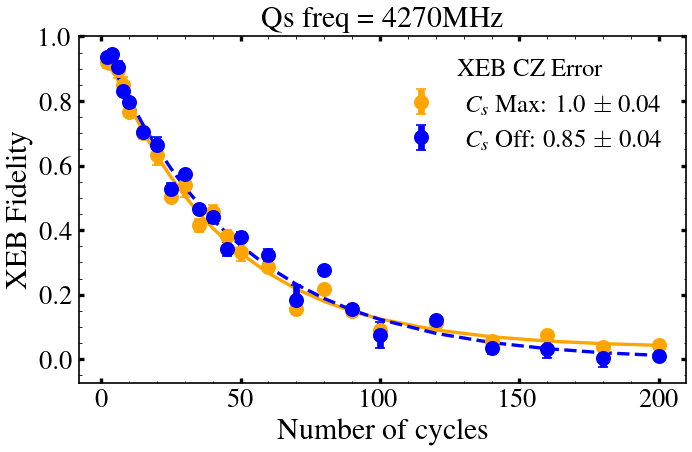

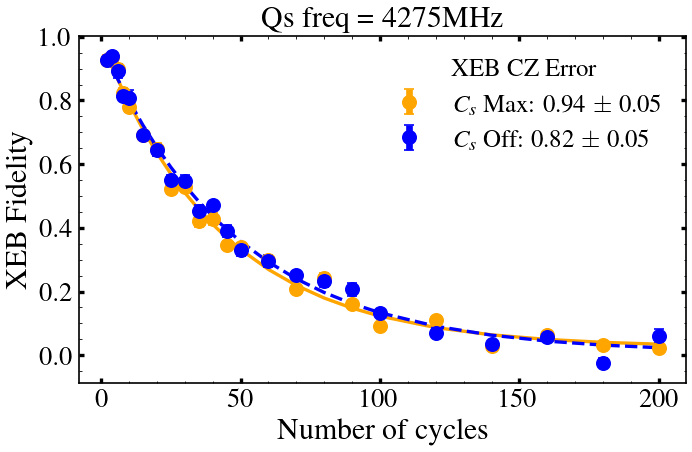

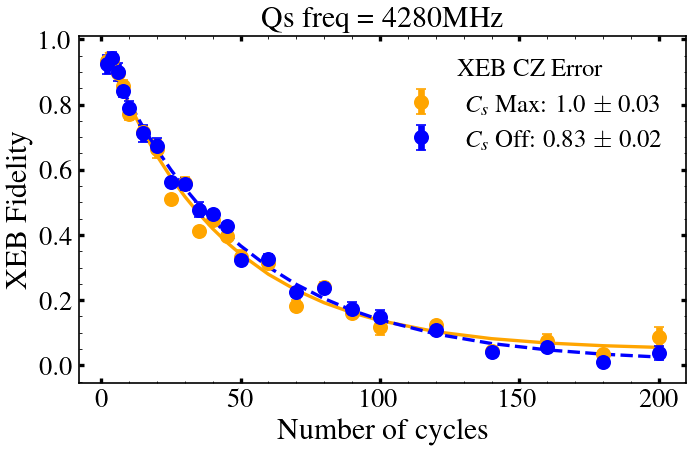

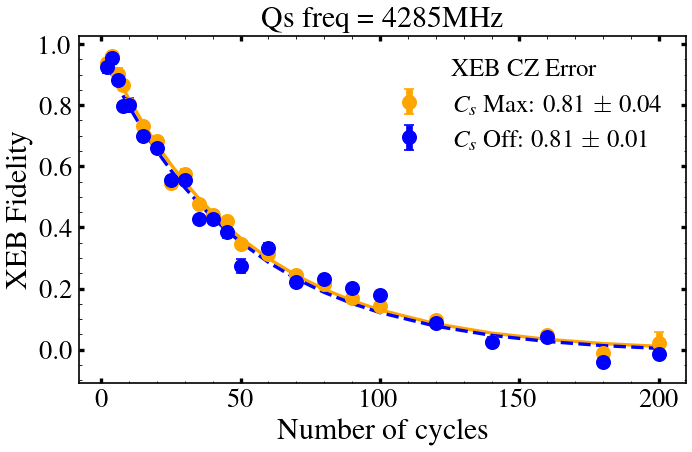

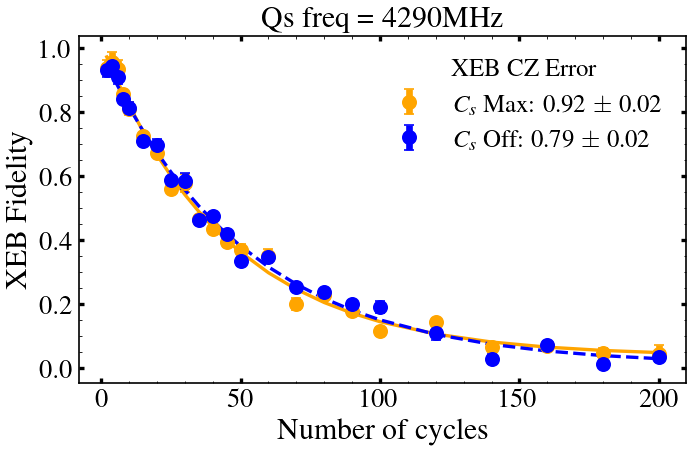

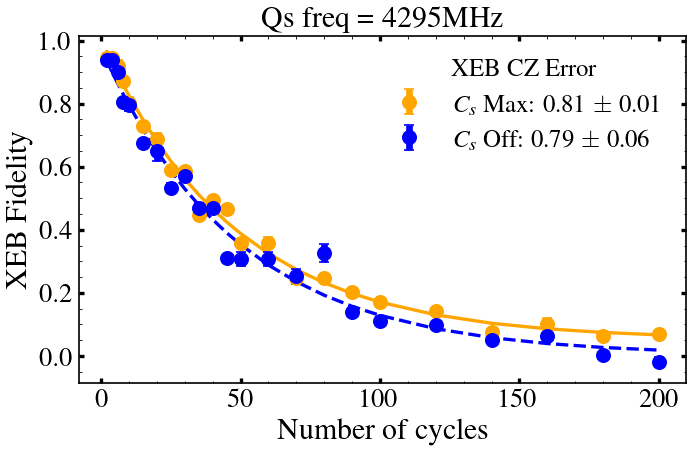

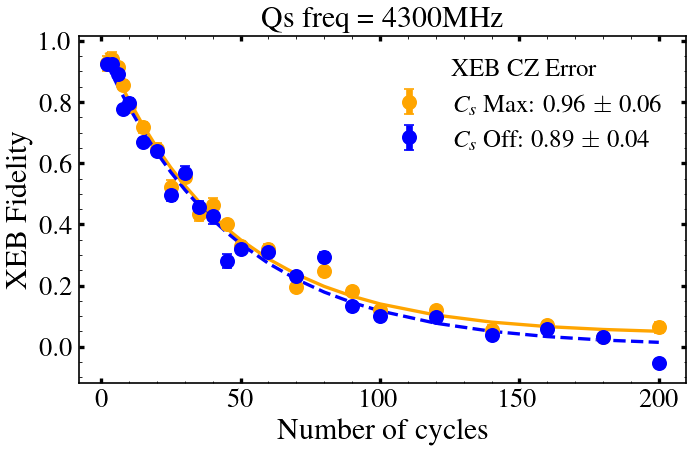

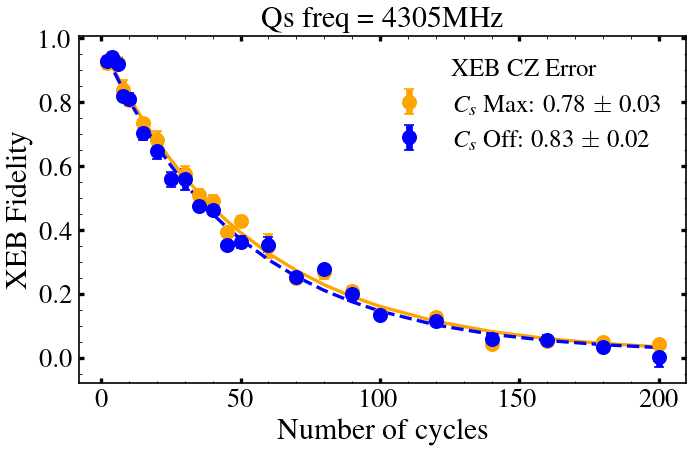

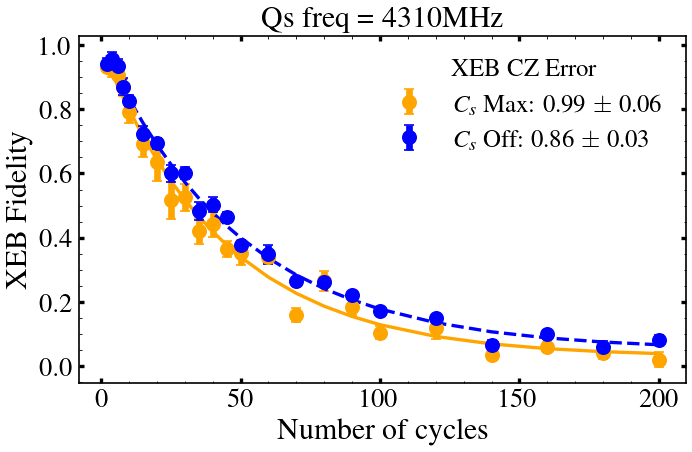

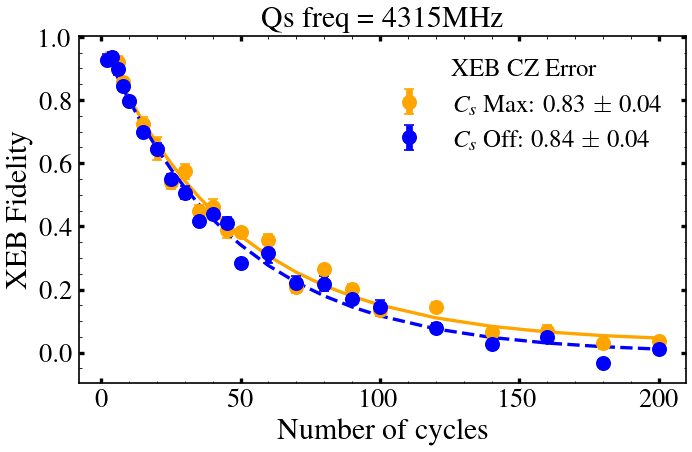

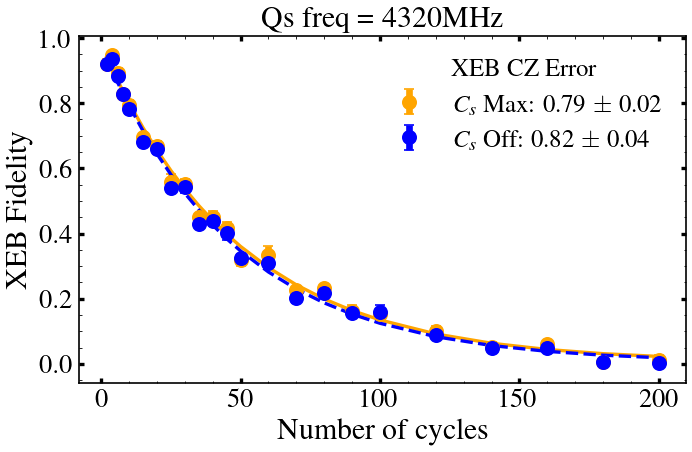

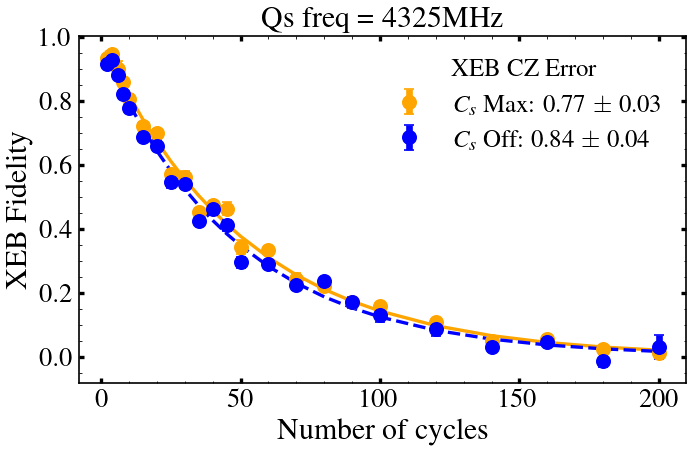

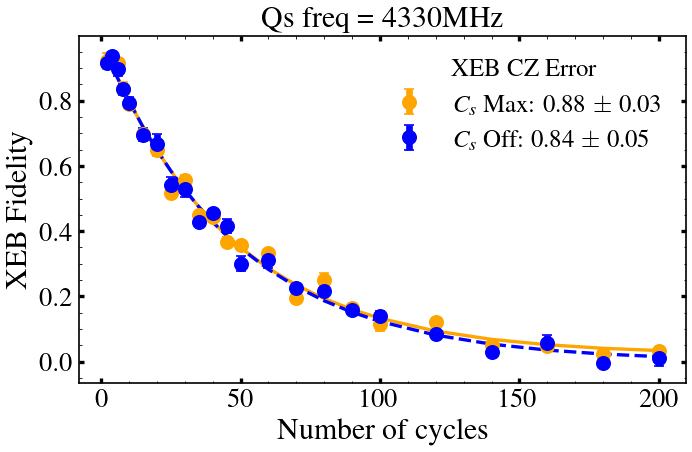

In [27]:
depths = qarange(2, 10, 2) + qarange(15, 50, 5) + qarange(
    60, 100, 10) + qarange(120, 200, 20)

error_max_mean_list = []
error_max_std_list = []
error_off_mean_list = []
error_off_std_list = []
qs_freq_list = []


for qs_freq in data:
    qs_freq = int(qs_freq)
    qs_freq_list.append(qs_freq)
    error_dict = data[str(qs_freq)]
    error_single = error_dict['error_single']
    print(error_single)
    fidelity_max_array = np.array(error_dict['6545.74']['fidelity_list'])
    fidelity_max_mean = np.mean(fidelity_max_array, axis=0)
    fidelity_max_std = np.std(fidelity_max_array, axis=0)
    fidelity_max_fit = xeb_fit(depths, fidelity_max_mean)
    error_max_fit = cal_fidelity(fidelity_max_fit)
    error_max_list = np.array(error_dict['6545.74']['error_cz']) - error_single
    error_max_mean = round(np.mean(error_max_list), 2)
    error_max_std = round(np.std(error_max_list), 2)
    error_max_mean_list.append(error_max_mean)
    error_max_std_list.append(error_max_std)

    fidelity_off_array = np.array(error_dict['6250']['fidelity_list'])
    fidelity_off_mean = np.mean(fidelity_off_array, axis=0)
    fidelity_off_std = np.std(fidelity_off_array, axis=0)
    fidelity_off_fit = xeb_fit(depths, fidelity_off_mean)
    error_off_fit = cal_fidelity(fidelity_off_fit)
    error_off_list = np.array(error_dict['6250']['error_cz']) - error_single
    error_off_mean = round(np.mean(error_off_list), 2)
    error_off_std = round(np.std(error_off_list), 2)
    error_off_mean_list.append(error_off_mean)
    error_off_std_list.append(error_off_std)

    
    xeb_plot(depths, fidelity_max_mean, fidelity_max_std, fidelity_off_mean,
             fidelity_off_std, fidelity_max_fit, fidelity_off_fit,
             error_max_mean, error_max_std, error_off_mean, error_off_std,
             qs_freq)

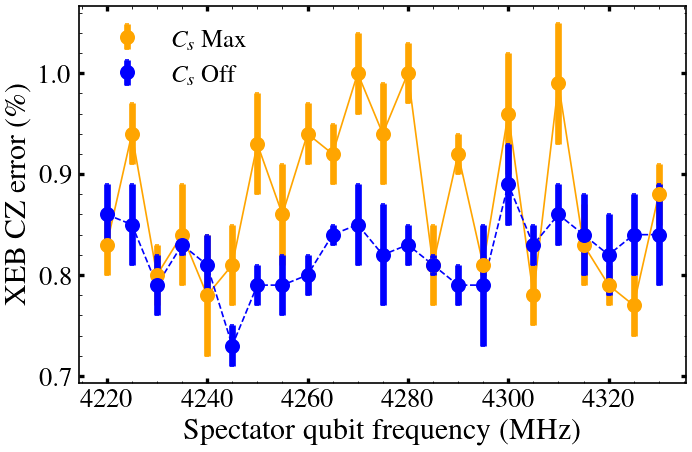

In [25]:
font = {'size': 18}

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(qs_freq_list, error_max_mean_list, color='orange', linewidth=1)
ax.errorbar(qs_freq_list,
            error_max_mean_list,
            error_max_std_list,
            fmt='o',
            capsize=1,
            color='orange',
            label=f'$C_s$ Max')
# ax.plot(depths,
#         rb_exponential_decay_func(np.array(depths), *fidelity_max_fit),
#         linewidth=2,
#         color='orange')

ax.errorbar(qs_freq_list,
            error_off_mean_list,
            error_off_std_list,
            fmt='o',
            capsize=1,
            color='blue',
            label=f'$C_s$ Off')
ax.plot(qs_freq_list, error_off_mean_list, color='blue', linewidth=1)
# ax.plot(depths,
#         rb_exponential_decay_func(np.array(depths), *fidelity_off_fit),
#         linewidth=2,
#         color='blue')

ax.set_xlabel(r'Spectator qubit frequency (MHz)', fontdict=font)
ax.set_ylabel(r'XEB CZ error (\%)', fontdict=font)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.tick_params(axis='both', which='major', width=2)  # 主刻度

spines = ax.spines

# 设置四个边框线的宽度
for spine in spines.values():
    spine.set_linewidth(1.)  # 设置线宽为2

# ax.set_title(f'Qs freq = {qs_freq}MHz', fontdict=font)
ax.legend(fontsize=15)
plt.tight_layout()

plt.savefig(os.path.join(dir_path, rf'qs 4220-4320 xeb对比.png'))